# TABLE OF CONTENTS:
---
* [Notebook Summary](#Notebook-Summary)
* [Setup](#Setup)
    * [Notebook Parameters](#Notebook-Parameters)
    * [Connect to Workspace](#Connect-to-Workspace)
* [Data](#Data)
    * [Overview](#Overview)
    * [Download & Extract Data](#Download-&-Extract-Data)
    * [Upload Data](#Upload-Data)
    * [Explore Data](#Explore-Data)
    * [Create and Register AML Dataset](#Create-and-Register-AML-Dataset)
---

# Notebook Summary

This notebook will download the [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) from the Stanford Vision website to the local compute and then upload it to the Azure Machine Learning (AML) workspace default blob storage. It will also create an AML file dataset that can be used for easy data access throughout the ML lifecycle.

Run this notebook from the Jupyter kernel that has been created in `00_environment_setup`.

# Setup

Append parent directory to sys path to be able to import created modules from src directory.

In [1]:
import sys
sys.path.append(os.path.dirname(os.path.abspath("")))

Automatically reload modules when changes are made.

In [2]:
%load_ext autoreload
%autoreload 2

Import libraries and modules.

In [3]:
# Import libraries
import azureml.core
import torchvision
from azureml.core import Dataset, Workspace

# Import created modules
from src.utils import download_stanford_dogs_archives, extract_stanford_dogs_archives
from src.utils import get_mean_std, load_data, load_unnormalized_train_data
from src.utils import show_image, show_batch_of_images

print(f"azureml.core version: {azureml.core.VERSION}")

azureml.core version: 1.20.0


### Notebook Parameters

In [9]:
# Specify data source directory
data_src_dir = "../data"

# Specify data store target path
datastore_target_path = "data/stanford_dogs"

# Specify dataset name
dataset_name = "stanford_dogs_dataset"

# Specify dataset description
dataset_description = "Stanford Dogs Dataset containing training, validation and test data"

# Specify dataset tags
dataset_tags = {"file_format": "jpg",
                "file_path_example": "data/stanford_dogs/val/n02085620-Chihuahua/n02085620_1152.jpg"}

# Specify path to an example of model input data
data_example_path = "../data/val/n02085620-Chihuahua/n02085620_1152.jpg"

### Connect to Workspace

In order to connect and communicate with the AML workspace, a workspace object needs to be instantiated using the AML Python SDK.

In [5]:
# Connect to the AML workspace using interactive authentication
ws = Workspace.from_config()

# Data

### Overview

The [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) is an image dataset that will be used to train a multiclass dog breed classification model. In total there are 120 different dog breeds/classes and 20,580 images. The dataset has been built using images and annotations from ImageNet for the task of fine-grained image categorization. The images are three-channel color images of variable pixels in size. While a file with a given train/test split can be downloaded from the website, the train dataset will be further split into a validation and train set (80:20). This will ultimately lead into a data distribution as follows:
- 9600 training images (47.65%)
- 2400 validation images (11.66%)
- 8580 test images (41.69%)

### Download & Extract Data

Download the data to the local compute.

A utility file with functions to download the dogs dataset archive files from the Stanford Vision website and to extract the archives into a format expected by the [torchvision.datasets.ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) has been created (`<PROJECT_ROOT>/src/utils/data_utils.py`).

In [6]:
# Download the dataset archive files
download_stanford_dogs_archives()

0it [00:00, ?it/s]

100%|█████████▉| 791568384/793579520 [02:18<00:00, 9579736.97it/s] 
0it [00:00, ?it/s]


 78%|███████▊  | 376832/481280 [00:02<00:00, 255386.55it/s]
483328it [00:02, 194003.49it/s]                            


In [7]:
# Extract the dataset archives and remove them after extraction
extract_stanford_dogs_archives()

Lists.tar archive has been extracted successfully.
File lists have been read successfully.
Extracting images.tar archive...


793583616it [02:30, 9579736.97it/s]                               
  1%|          | 194/20701 [00:30<53:50,  6.35it/s]


  2%|▏         | 403/20701 [00:57<36:39,  9.23it/s]


  3%|▎         | 627/20701 [01:25<42:12,  7.93it/s]


  4%|▍         | 839/20701 [01:54<54:20,  6.09it/s]  


  5%|▍         | 1020/20701 [02:22<58:19,  5.62it/s]  


  6%|▌         | 1187/20701 [02:53<1:14:52,  4.34it/s]


  6%|▋         | 1340/20701 [03:26<1:03:50,  5.06it/s]


  7%|▋         | 1504/20701 [03:56<1:00:17,  5.31it/s]


  8%|▊         | 1684/20701 [04:24<1:01:06,  5.19it/s]


  9%|▉         | 1841/20701 [04:58<1:13:38,  4.27it/s]


 10%|▉         | 1993/20701 [05:32<2:03:00,  2.53it/s]


 10%|█         | 2169/20701 [06:03<46:31,  6.64it/s]


 11%|█         | 2327/20701 [06:39<1:05:20,  4.69it/s]


 12%|█▏        | 2501/20701 [07:07<47:53,  6.33it/s]


 13%|█▎        | 2669/20701 [07:38<1:01:57,  4.85it/s]


 14%|█▎        | 2842/20701 [08:10<40:07,  7.42it/s]


 15%|█▍        | 3025/20701 [08:37<44:40,  6.59it/s]


 16%|█▌        | 3222/20701 [09:03<44:36,  6.53it/s]


 16%|█▋        | 3393/20701 [09:32<1:01:55,  4.66it/s]


 17%|█▋        | 3558/20701 [10:02<57:27,  4.97it/s]  


 18%|█▊        | 3716/20701 [10:35<42:19,  6.69it/s]


 19%|█▉        | 3892/20701 [11:01<33:10,  8.44it/s]


 20%|█▉        | 4063/20701 [11:27<59:13,  4.68it/s]


 20%|██        | 4233/20701 [11:55<1:12:36,  3.78it/s]


 21%|██▏       | 4413/20701 [12:23<40:30,  6.70it/s]


 22%|██▏       | 4586/20701 [12:55<40:29,  6.63it/s]


 23%|██▎       | 4764/20701 [13:25<35:40,  7.45it/s]


 24%|██▍       | 4944/20701 [13:58<35:54,  7.31it/s]


 25%|██▍       | 5118/20701 [14:27<36:28,  7.12it/s]


 26%|██▌       | 5292/20701 [14:55<50:31,  5.08it/s]


 26%|██▋       | 5454/20701 [15:24<43:49,  5.80it/s]


 27%|██▋       | 5605/20701 [16:01<44:53,  5.60it/s]


 28%|██▊       | 5785/20701 [16:30<59:19,  4.19it/s]


 29%|██▉       | 5956/20701 [16:59<45:00,  5.46it/s]


 30%|██▉       | 6130/20701 [17:32<29:58,  8.10it/s]


 30%|███       | 6281/20701 [18:10<34:34,  6.95it/s]


 31%|███       | 6443/20701 [18:48<1:44:45,  2.27it/s]


 32%|███▏      | 6592/20701 [19:27<54:48,  4.29it/s]


 33%|███▎      | 6751/20701 [20:00<44:46,  5.19it/s]


 33%|███▎      | 6914/20701 [20:34<45:33,  5.04it/s]


 34%|███▍      | 7074/20701 [21:06<56:20,  4.03it/s]


 35%|███▍      | 7240/20701 [21:37<30:57,  7.25it/s]


 36%|███▌      | 7397/20701 [22:06<1:37:01,  2.29it/s]


 37%|███▋      | 7565/20701 [22:36<45:04,  4.86it/s]


 37%|███▋      | 7728/20701 [23:07<48:41,  4.44it/s]


 38%|███▊      | 7891/20701 [23:38<37:21,  5.72it/s]


 39%|███▉      | 8052/20701 [24:10<50:38,  4.16it/s]


 40%|███▉      | 8223/20701 [24:43<45:53,  4.53it/s]


 41%|████      | 8395/20701 [25:17<35:01,  5.86it/s]


 41%|████▏     | 8560/20701 [25:54<31:30,  6.42it/s]


 42%|████▏     | 8713/20701 [26:25<36:17,  5.50it/s]


 43%|████▎     | 8882/20701 [26:55<39:54,  4.94it/s]


 44%|████▍     | 9068/20701 [27:25<37:32,  5.16it/s]


 45%|████▍     | 9246/20701 [27:54<36:12,  5.27it/s]


 46%|████▌     | 9429/20701 [28:25<29:42,  6.32it/s]


 46%|████▋     | 9604/20701 [28:57<35:45,  5.17it/s]


 47%|████▋     | 9787/20701 [29:25<38:59,  4.67it/s]


 48%|████▊     | 9970/20701 [29:53<25:10,  7.10it/s]


 49%|████▉     | 10158/20701 [30:22<27:50,  6.31it/s]


 50%|████▉     | 10338/20701 [30:50<39:51,  4.33it/s]


 51%|█████     | 10519/20701 [31:17<22:28,  7.55it/s]


 52%|█████▏    | 10713/20701 [31:45<23:23,  7.12it/s]


 53%|█████▎    | 10907/20701 [32:15<22:48,  7.16it/s]


 54%|█████▎    | 11106/20701 [32:41<28:23,  5.63it/s]


 55%|█████▍    | 11291/20701 [33:09<32:22,  4.84it/s]


 55%|█████▌    | 11484/20701 [33:34<21:38,  7.10it/s]


 56%|█████▋    | 11679/20701 [33:59<27:08,  5.54it/s]


 57%|█████▋    | 11882/20701 [34:26<16:00,  9.18it/s]


 58%|█████▊    | 12099/20701 [34:52<19:55,  7.19it/s]


 59%|█████▉    | 12286/20701 [35:17<14:08,  9.91it/s]


 60%|██████    | 12494/20701 [35:44<24:40,  5.54it/s]


 61%|██████    | 12668/20701 [36:14<15:23,  8.70it/s]


 62%|██████▏   | 12858/20701 [36:41<15:02,  8.69it/s]


 63%|██████▎   | 13069/20701 [37:09<24:50,  5.12it/s]


 64%|██████▍   | 13255/20701 [37:38<19:41,  6.30it/s]


 65%|██████▌   | 13461/20701 [38:06<17:42,  6.81it/s]


 66%|██████▌   | 13696/20701 [38:35<14:25,  8.09it/s]


 67%|██████▋   | 13954/20701 [39:04<10:57, 10.26it/s]


 68%|██████▊   | 14171/20701 [39:31<10:53,  9.99it/s]


 69%|██████▉   | 14379/20701 [39:57<10:36,  9.93it/s]


 70%|███████   | 14593/20701 [40:23<11:14,  9.05it/s]


 72%|███████▏  | 14826/20701 [40:51<09:59,  9.80it/s]


 73%|███████▎  | 15040/20701 [41:20<11:54,  7.93it/s]


 74%|███████▎  | 15264/20701 [41:46<09:52,  9.18it/s]


 75%|███████▍  | 15483/20701 [42:13<10:36,  8.20it/s]


 76%|███████▌  | 15676/20701 [42:38<10:23,  8.05it/s]


 77%|███████▋  | 15868/20701 [43:03<12:59,  6.20it/s]


 78%|███████▊  | 16064/20701 [43:29<14:05,  5.48it/s]


 79%|███████▊  | 16254/20701 [43:54<08:38,  8.57it/s]


 79%|███████▉  | 16442/20701 [44:20<09:11,  7.72it/s]


 80%|████████  | 16632/20701 [44:43<08:28,  8.00it/s]


 81%|████████▏ | 16828/20701 [45:09<07:42,  8.38it/s]


 82%|████████▏ | 17022/20701 [45:37<06:51,  8.95it/s]


 83%|████████▎ | 17225/20701 [46:04<08:17,  6.99it/s]


 84%|████████▍ | 17433/20701 [46:29<14:38,  3.72it/s]


 85%|████████▌ | 17632/20701 [47:00<07:27,  6.85it/s]


 86%|████████▌ | 17850/20701 [47:28<05:32,  8.57it/s]


 87%|████████▋ | 18060/20701 [47:53<07:19,  6.00it/s]


 88%|████████▊ | 18246/20701 [48:23<06:05,  6.72it/s]


 89%|████████▉ | 18428/20701 [48:48<06:00,  6.31it/s]


 90%|████████▉ | 18605/20701 [49:16<04:20,  8.05it/s]


 91%|█████████ | 18792/20701 [49:46<05:07,  6.20it/s]


 92%|█████████▏| 18989/20701 [50:13<04:15,  6.70it/s]


 93%|█████████▎| 19188/20701 [50:42<02:50,  8.89it/s]


 94%|█████████▎| 19397/20701 [51:11<02:50,  7.64it/s]


 95%|█████████▍| 19579/20701 [51:36<02:23,  7.82it/s]


 96%|█████████▌| 19781/20701 [52:06<02:03,  7.45it/s]


 97%|█████████▋| 19986/20701 [52:34<01:05, 11.00it/s]


 98%|█████████▊| 20194/20701 [53:03<01:12,  7.01it/s]


 99%|█████████▊| 20397/20701 [53:29<00:42,  7.14it/s]


 99%|█████████▉| 20571/20701 [54:05<00:27,  4.71it/s]


100%|██████████| 20701/20701 [54:27<00:00,  6.34it/s]


Images.tar archive has been extracted successfully.
Removing archive files.


### Upload Data

Upload the data to the default AML datastore.

In [10]:
datastore = ws.get_default_datastore()
datastore.upload(src_dir=data_src_dir, target_path=datastore_target_path, overwrite=True)

Uploading an estimated of 20580 files
Uploading ../data/test/n02085620-Chihuahua/n02085620_10074.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_10074.jpg, 1 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_10131.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_10131.jpg, 2 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_1073.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_1073.jpg, 3 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_11337.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_11337.jpg, 4 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_11477.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_11477.jpg, 5 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_11696.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_1169

Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1401.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1401.jpg, 55 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1425.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1425.jpg, 56 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1610.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1610.jpg, 57 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_17.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_17.jpg, 58 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1724.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1724.jpg, 59 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1764.jpg
Uploaded ../data/test/n02

Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_2354.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_2354.jpg, 108 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_3810.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_3810.jpg, 109 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_3855.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_3855.jpg, 110 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_3979.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_3979.jpg, 111 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_4269.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_4269.jpg, 112 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_4351.jpg
Uploaded ../data

Uploading ../data/test/n02085936-Maltese_dog/n02085936_20076.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_20076.jpg, 164 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_22127.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_22127.jpg, 165 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_22666.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_22666.jpg, 166 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_24464.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_24464.jpg, 167 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_2536.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_2536.jpg, 168 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_2543.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_2543.jpg,

Uploading ../data/test/n02085936-Maltese_dog/n02085936_4916.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_4916.jpg, 233 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_4921.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_4921.jpg, 234 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_5766.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_5766.jpg, 235 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_6077.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_6077.jpg, 236 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_6656.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_6656.jpg, 237 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_7172.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_7172.jpg, 238 fil

Uploading ../data/test/n02086079-Pekinese/n02086079_10600.jpg
Uploaded ../data/test/n02086079-Pekinese/n02086079_10600.jpg, 295 files out of an estimated total of 20580
Uploading ../data/test/n02086079-Pekinese/n02086079_2209.jpg
Uploaded ../data/test/n02086079-Pekinese/n02086079_2209.jpg, 296 files out of an estimated total of 20580
Uploading ../data/test/n02086079-Pekinese/n02086079_22136.jpg
Uploaded ../data/test/n02086079-Pekinese/n02086079_22136.jpg, 297 files out of an estimated total of 20580
Uploading ../data/test/n02086079-Pekinese/n02086079_2793.jpg
Uploaded ../data/test/n02086079-Pekinese/n02086079_2793.jpg, 298 files out of an estimated total of 20580
Uploading ../data/test/n02086079-Pekinese/n02086079_3493.jpg
Uploaded ../data/test/n02086079-Pekinese/n02086079_3493.jpg, 299 files out of an estimated total of 20580
Uploading ../data/test/n02086079-Pekinese/n02086079_499.jpg
Uploaded ../data/test/n02086079-Pekinese/n02086079_499.jpg, 300 files out of an estimated total of 20

Uploading ../data/test/n02086240-Shih-Tzu/n02086240_1770.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_1770.jpg, 349 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_254.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_254.jpg, 350 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_271.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_271.jpg, 351 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_3137.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_3137.jpg, 352 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_3217.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_3217.jpg, 353 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_3227.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_3227.jpg, 354 files out of an estimated total of 20580
Up

Uploading ../data/test/n02086240-Shih-Tzu/n02086240_5703.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_5703.jpg, 408 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_7728.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_7728.jpg, 409 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_8017.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_8017.jpg, 410 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_8108.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_8108.jpg, 411 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_818.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_818.jpg, 412 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_8812.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_8812.jpg, 413 files out of an estimated total of 20580


Uploading ../data/test/n02086240-Shih-Tzu/n02086240_8489.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_8489.jpg, 460 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_1590.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_1590.jpg, 461 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2252.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_2252.jpg, 462 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2478.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_2478.jpg, 463 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2700.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_2700.jpg, 464 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2813.jpg
Uploaded ../data/test/n02086646-

Uploading ../data/test/n02086910-papillon/n02086910_2084.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_2084.jpg, 528 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_334.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_334.jpg, 529 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_3478.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_3478.jpg, 530 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_3633.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_3633.jpg, 531 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_3795.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_3795.jpg, 532 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_3866.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_3866.jpg, 533 files out of an estimated total of 20580


Uploading ../data/test/n02087046-toy_terrier/n02087046_228.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_228.jpg, 601 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_357.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_357.jpg, 602 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_3608.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_3608.jpg, 603 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_3651.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_3651.jpg, 604 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_3724.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_3724.jpg, 605 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_3923.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_3923.jpg, 606 files o

Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_2427.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_2427.jpg, 675 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_310.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_310.jpg, 676 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_3619.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_3619.jpg, 677 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_4147.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_4147.jpg, 678 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_4741.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_4741.jpg, 679 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n020

Uploading ../data/test/n02088094-Afghan_hound/n02088094_12879.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_12879.jpg, 732 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_13145.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_13145.jpg, 733 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_13270.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_13270.jpg, 734 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_13502.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_13502.jpg, 735 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_1357.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_1357.jpg, 736 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_13909.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088

Uploading ../data/test/n02088094-Afghan_hound/n02088094_3531.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_3531.jpg, 787 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_3620.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_3620.jpg, 788 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_3858.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_3858.jpg, 789 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_3989.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_3989.jpg, 790 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_4195.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_4195.jpg, 791 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_4230.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_4230.

Uploading ../data/test/n02088094-Afghan_hound/n02088094_8764.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_8764.jpg, 862 files out of an estimated total of 20580
Uploading ../data/test/n02088238-basset/n02088238_10757.jpg
Uploaded ../data/test/n02088238-basset/n02088238_10757.jpg, 863 files out of an estimated total of 20580
Uploading ../data/test/n02088238-basset/n02088238_11917.jpg
Uploaded ../data/test/n02088238-basset/n02088238_11917.jpg, 864 files out of an estimated total of 20580
Uploading ../data/test/n02088238-basset/n02088238_12160.jpg
Uploaded ../data/test/n02088238-basset/n02088238_12160.jpg, 865 files out of an estimated total of 20580
Uploading ../data/test/n02088238-basset/n02088238_12196.jpg
Uploaded ../data/test/n02088238-basset/n02088238_12196.jpg, 866 files out of an estimated total of 20580
Uploading ../data/test/n02088238-basset/n02088238_12966.jpg
Uploaded ../data/test/n02088238-basset/n02088238_12966.jpg, 867 files out of an estimated total of 20580


Uploading ../data/test/n02088364-beagle/n02088364_12713.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_12713.jpg, 936 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_13028.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_13028.jpg, 937 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_13128.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_13128.jpg, 938 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_13214.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_13214.jpg, 939 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_13477.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_13477.jpg, 940 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_13627.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_13627.jpg, 941 files out of an estimated total of 20580
Uploading 

Uploading ../data/test/n02088466-bloodhound/n02088466_11827.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_11827.jpg, 1005 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_1555.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_1555.jpg, 1006 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_3096.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_3096.jpg, 1007 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_3217.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_3217.jpg, 1008 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_3448.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_3448.jpg, 1009 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_3568.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_3568.jpg, 1010 files o

Uploading ../data/test/n02088466-bloodhound/n02088466_9029.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_9029.jpg, 1063 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_9046.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_9046.jpg, 1064 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_9058.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_9058.jpg, 1065 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_9069.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_9069.jpg, 1066 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_9245.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_9245.jpg, 1067 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_9356.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_9356.jpg, 1068 files out

Uploading ../data/test/n02088632-bluetick/n02088632_3362.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_3362.jpg, 1115 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_3545.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_3545.jpg, 1116 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_3737.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_3737.jpg, 1117 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_401.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_401.jpg, 1118 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_4109.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_4109.jpg, 1119 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_4305.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_4305.jpg, 1120 files out of an estimated total of 

Uploading ../data/test/n02089078-black-and-tan_coonhound/n02089078_2232.jpg
Uploaded ../data/test/n02089078-black-and-tan_coonhound/n02089078_2232.jpg, 1167 files out of an estimated total of 20580
Uploading ../data/test/n02089078-black-and-tan_coonhound/n02089078_2333.jpg
Uploaded ../data/test/n02089078-black-and-tan_coonhound/n02089078_2333.jpg, 1168 files out of an estimated total of 20580
Uploading ../data/test/n02089078-black-and-tan_coonhound/n02089078_2464.jpg
Uploaded ../data/test/n02089078-black-and-tan_coonhound/n02089078_2464.jpg, 1169 files out of an estimated total of 20580
Uploading ../data/test/n02089078-black-and-tan_coonhound/n02089078_2794.jpg
Uploaded ../data/test/n02089078-black-and-tan_coonhound/n02089078_2794.jpg, 1170 files out of an estimated total of 20580
Uploading ../data/test/n02089078-black-and-tan_coonhound/n02089078_2921.jpg
Uploaded ../data/test/n02089078-black-and-tan_coonhound/n02089078_2921.jpg, 1171 files out of an estimated total of 20580
Uploading 

Uploading ../data/test/n02089867-Walker_hound/n02089867_1824.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_1824.jpg, 1222 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_1882.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_1882.jpg, 1223 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_1965.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_1965.jpg, 1224 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_1987.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_1987.jpg, 1225 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_2596.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_2596.jpg, 1226 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_2758.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_

Uploading ../data/test/n02089867-Walker_hound/n02089867_3727.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_3727.jpg, 1269 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_1303.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_1303.jpg, 1270 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_1458.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_1458.jpg, 1271 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_1516.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_1516.jpg, 1272 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_2457.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_2457.jpg, 1273 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_2476.jpg
Uploaded ../data/te

Uploading ../data/test/n02090379-redbone/n02090379_1346.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_1346.jpg, 1323 files out of an estimated total of 20580
Uploading ../data/test/n02090379-redbone/n02090379_1360.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_1360.jpg, 1324 files out of an estimated total of 20580
Uploading ../data/test/n02090379-redbone/n02090379_2420.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_2420.jpg, 1325 files out of an estimated total of 20580
Uploading ../data/test/n02090379-redbone/n02090379_2836.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_2836.jpg, 1326 files out of an estimated total of 20580
Uploading ../data/test/n02090379-redbone/n02090379_3131.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_3131.jpg, 1327 files out of an estimated total of 20580
Uploading ../data/test/n02090379-redbone/n02090379_3768.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_3768.jpg, 1328 files out of an estimated total of 20580
Uplo

Uploading ../data/test/n02090622-borzoi/n02090622_8703.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_8703.jpg, 1395 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_906.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_906.jpg, 1396 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_9415.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_9415.jpg, 1397 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_1041.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_1041.jpg, 1398 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_1127.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_1127.jpg, 1399 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_1292.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_1292.jpg, 1400 files

Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_2860.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_2860.jpg, 1455 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_363.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_363.jpg, 1456 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_3761.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_3761.jpg, 1457 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_3811.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_3811.jpg, 1458 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_3866.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_3866.jpg, 1459 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_3940.jpg
Uploaded ../data/test/n0

Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_4376.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_4376.jpg, 1502 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_5465.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_5465.jpg, 1503 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_5759.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_5759.jpg, 1504 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_728.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_728.jpg, 1505 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_731.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_731.jpg, 1506 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_847.jpg
Uploaded ../data/test/n0209

Uploading ../data/test/n02091032-Italian_greyhound/n02091032_1041.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_1041.jpg, 1551 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_11549.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_11549.jpg, 1552 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_1360.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_1360.jpg, 1553 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_1679.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_1679.jpg, 1554 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_1743.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_1743.jpg, 1555 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_1933.jp

Uploading ../data/test/n02091134-whippet/n02091134_10107.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_10107.jpg, 1600 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_10548.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_10548.jpg, 1601 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_11765.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_11765.jpg, 1602 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_13544.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_13544.jpg, 1603 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_13743.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_13743.jpg, 1604 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_14090.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_14090.jpg, 1605 files out of an estimated total o

Uploading ../data/test/n02091134-whippet/n02091134_4078.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_4078.jpg, 1668 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_732.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_732.jpg, 1669 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_835.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_835.jpg, 1670 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_9740.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_9740.jpg, 1671 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_9806.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_9806.jpg, 1672 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_100.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_100.jpg, 1673 files out of an estimated total of 20580


Uploading ../data/test/n02091244-Ibizan_hound/n02091244_2838.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_2838.jpg, 1715 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_3315.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_3315.jpg, 1716 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_3320.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_3320.jpg, 1717 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_3369.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_3369.jpg, 1718 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_3552.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_3552.jpg, 1719 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_3748.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_

Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_1487.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_1487.jpg, 1769 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_2094.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_2094.jpg, 1770 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_2343.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_2343.jpg, 1771 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_2366.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_2366.jpg, 1772 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_3131.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_3131.jpg, 1773 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n0209146

Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_5755.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_5755.jpg, 1813 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_6457.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_6457.jpg, 1814 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_6459.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_6459.jpg, 1815 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_6670.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_6670.jpg, 1816 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_6726.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_6726.jpg, 1817 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n0209146

Uploading ../data/test/n02091635-otterhound/n02091635_2594.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_2594.jpg, 1859 files out of an estimated total of 20580
Uploading ../data/test/n02091635-otterhound/n02091635_2887.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_2887.jpg, 1860 files out of an estimated total of 20580
Uploading ../data/test/n02091635-otterhound/n02091635_2958.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_2958.jpg, 1861 files out of an estimated total of 20580
Uploading ../data/test/n02091635-otterhound/n02091635_335.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_335.jpg, 1862 files out of an estimated total of 20580
Uploading ../data/test/n02091635-otterhound/n02091635_3661.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_3661.jpg, 1863 files out of an estimated total of 20580
Uploading ../data/test/n02091635-otterhound/n02091635_386.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_386.jpg, 1864 files out of 

Uploading ../data/test/n02091831-Saluki/n02091831_1439.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_1439.jpg, 1911 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_2108.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_2108.jpg, 1912 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_2638.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_2638.jpg, 1913 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_2779.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_2779.jpg, 1914 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_2858.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_2858.jpg, 1915 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_304.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_304.jpg, 1916 files out of an estimated total of 20580
Uploading ../data/

Uploading ../data/test/n02091831-Saluki/n02091831_961.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_961.jpg, 1985 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_10699.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_10699.jpg, 1986 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_1170.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_1170.jpg, 1987 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_12414.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_12414.jpg, 1988 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_1253.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_1253.jpg, 1989 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_12544.jpg
Uploaded .

Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_1693.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_1693.jpg, 2035 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_3.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_3.jpg, 2036 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_3271.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_3271.jpg, 2037 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_3314.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_3314.jpg, 2038 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_3400.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_3400.jpg, 2039 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_3500

Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_5377.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_5377.jpg, 2083 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_6007.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_6007.jpg, 2084 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_6618.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_6618.jpg, 2085 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_6702.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_6702.jpg, 2086 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_6729.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_6729.jpg, 2087 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n0209200

Uploading ../data/test/n02092339-Weimaraner/n02092339_5313.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_5313.jpg, 2139 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_5438.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_5438.jpg, 2140 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_5740.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_5740.jpg, 2141 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_5845.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_5845.jpg, 2142 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_5981.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_5981.jpg, 2143 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_6114.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_6114.jpg, 2144 files out

Uploading ../data/test/n02093256-Staffordshire_bullterrier/n02093256_2780.jpg
Uploaded ../data/test/n02093256-Staffordshire_bullterrier/n02093256_2780.jpg, 2188 files out of an estimated total of 20580
Uploading ../data/test/n02093256-Staffordshire_bullterrier/n02093256_291.jpg
Uploaded ../data/test/n02093256-Staffordshire_bullterrier/n02093256_291.jpg, 2189 files out of an estimated total of 20580
Uploading ../data/test/n02093256-Staffordshire_bullterrier/n02093256_3306.jpg
Uploaded ../data/test/n02093256-Staffordshire_bullterrier/n02093256_3306.jpg, 2190 files out of an estimated total of 20580
Uploading ../data/test/n02093256-Staffordshire_bullterrier/n02093256_3325.jpg
Uploaded ../data/test/n02093256-Staffordshire_bullterrier/n02093256_3325.jpg, 2191 files out of an estimated total of 20580
Uploading ../data/test/n02093256-Staffordshire_bullterrier/n02093256_3353.jpg
Uploaded ../data/test/n02093256-Staffordshire_bullterrier/n02093256_3353.jpg, 2192 files out of an estimated total o

Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_2214.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_2214.jpg, 2237 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_2519.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_2519.jpg, 2238 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_2574.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_2574.jpg, 2239 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_3331.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_3331.jpg, 2240 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_3380.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093

Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_1235.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_1235.jpg, 2284 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_1278.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_1278.jpg, 2285 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_1306.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_1306.jpg, 2286 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_1346.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_1346.jpg, 2287 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_1550.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_1550.jpg, 2288 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n0209364

Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_3150.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_3150.jpg, 2338 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_316.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_316.jpg, 2339 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_3209.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_3209.jpg, 2340 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_3277.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_3277.jpg, 2341 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_356.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_356.jpg, 2342 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_63

Uploading ../data/test/n02093754-Border_terrier/n02093754_6106.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_6106.jpg, 2403 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_6432.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_6432.jpg, 2404 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_6453.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_6453.jpg, 2405 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_667.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_667.jpg, 2406 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_7014.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_7014.jpg, 2407 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_7025.jpg
Uploaded ../data/test/n02093754-Bor

Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_1917.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_1917.jpg, 2453 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_2030.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_2030.jpg, 2454 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_2286.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_2286.jpg, 2455 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_2293.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_2293.jpg, 2456 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_262.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_262.jpg, 2457 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_

Uploading ../data/test/n02093991-Irish_terrier/n02093991_199.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_199.jpg, 2509 files out of an estimated total of 20580
Uploading ../data/test/n02093991-Irish_terrier/n02093991_202.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_202.jpg, 2510 files out of an estimated total of 20580
Uploading ../data/test/n02093991-Irish_terrier/n02093991_2123.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_2123.jpg, 2511 files out of an estimated total of 20580
Uploading ../data/test/n02093991-Irish_terrier/n02093991_2442.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_2442.jpg, 2512 files out of an estimated total of 20580
Uploading ../data/test/n02093991-Irish_terrier/n02093991_281.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_281.jpg, 2513 files out of an estimated total of 20580
Uploading ../data/test/n02093991-Irish_terrier/n02093991_2822.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n020

Uploading ../data/test/n02093991-Irish_terrier/n02093991_652.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_652.jpg, 2557 files out of an estimated total of 20580
Uploading ../data/test/n02093991-Irish_terrier/n02093991_716.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_716.jpg, 2558 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_1173.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_1173.jpg, 2559 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_1330.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_1330.jpg, 2560 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_1448.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_1448.jpg, 2561 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_1459.jpg
Uploaded ../data/test/n02094114-No

Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_3477.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_3477.jpg, 2604 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_348.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_348.jpg, 2605 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_3545.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_3545.jpg, 2606 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_3737.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_3737.jpg, 2607 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_3920.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_3920.jpg, 2608 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_3928.jpg
Uploaded ../data/test/n0

Uploading ../data/test/n02094258-Norwich_terrier/n02094258_1862.jpg
Uploaded ../data/test/n02094258-Norwich_terrier/n02094258_1862.jpg, 2656 files out of an estimated total of 20580
Uploading ../data/test/n02094258-Norwich_terrier/n02094258_1985.jpg
Uploaded ../data/test/n02094258-Norwich_terrier/n02094258_1985.jpg, 2657 files out of an estimated total of 20580
Uploading ../data/test/n02094258-Norwich_terrier/n02094258_2032.jpg
Uploaded ../data/test/n02094258-Norwich_terrier/n02094258_2032.jpg, 2658 files out of an estimated total of 20580
Uploading ../data/test/n02094258-Norwich_terrier/n02094258_221.jpg
Uploaded ../data/test/n02094258-Norwich_terrier/n02094258_221.jpg, 2659 files out of an estimated total of 20580
Uploading ../data/test/n02094258-Norwich_terrier/n02094258_2380.jpg
Uploaded ../data/test/n02094258-Norwich_terrier/n02094258_2380.jpg, 2660 files out of an estimated total of 20580
Uploading ../data/test/n02094258-Norwich_terrier/n02094258_2463.jpg
Uploaded ../data/test/n0

Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_1324.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_1324.jpg, 2716 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_1483.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_1483.jpg, 2717 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_1869.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_1869.jpg, 2718 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_2105.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_2105.jpg, 2719 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_2114.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_2114.jpg, 2720 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_2564.jpg


Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_7191.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_7191.jpg, 2772 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_7702.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_7702.jpg, 2773 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_800.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_800.jpg, 2774 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_923.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_923.jpg, 2775 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_96.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_96.jpg, 2776 files out of an estimated total of 20580
Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_1043.jpg
Up

Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_547.jpg
Uploaded ../data/test/n02095314-wire-haired_fox_terrier/n02095314_547.jpg, 2824 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_1031.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_1031.jpg, 2825 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_104.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_104.jpg, 2826 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_1149.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_1149.jpg, 2827 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_1176.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_1176.jpg, 2828 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_1208.jpg
U

Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_2738.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_2738.jpg, 2871 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_3881.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_3881.jpg, 2872 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_4042.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_4042.jpg, 2873 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_4259.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_4259.jpg, 2874 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_429.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_429.jpg, 2875 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_434.jpg
Uploaded ../da

Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_845.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_845.jpg, 2921 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_1241.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_1241.jpg, 2922 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_1328.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_1328.jpg, 2923 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_1348.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_1348.jpg, 2924 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_1397.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_1397.jpg, 2925 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_1723.jpg
Uploaded ../d

Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_3110.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_3110.jpg, 2979 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_4099.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_4099.jpg, 2980 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_4964.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_4964.jpg, 2981 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_5221.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_5221.jpg, 2982 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_5241.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_5241.jpg, 2983 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_5255.jpg
Uploaded ..

Uploading ../data/test/n02096051-Airedale/n02096051_119.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_119.jpg, 3026 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_1740.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_1740.jpg, 3027 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_1799.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_1799.jpg, 3028 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_1861.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_1861.jpg, 3029 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_2002.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_2002.jpg, 3030 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_2204.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_2204.jpg, 3031 files out of an estimated total of 

Uploading ../data/test/n02096051-Airedale/n02096051_6855.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_6855.jpg, 3094 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_8431.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_8431.jpg, 3095 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_8880.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_8880.jpg, 3096 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_8937.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_8937.jpg, 3097 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_9319.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_9319.jpg, 3098 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_9327.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_9327.jpg, 3099 files out of an estimated total o

Uploading ../data/test/n02096177-cairn/n02096177_1516.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_1516.jpg, 3147 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_2095.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_2095.jpg, 3148 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_2463.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_2463.jpg, 3149 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_2560.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_2560.jpg, 3150 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_3.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_3.jpg, 3151 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_308.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_308.jpg, 3152 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cai

Uploading ../data/test/n02096177-cairn/n02096177_8324.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_8324.jpg, 3213 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_9630.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_9630.jpg, 3214 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_2580.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_2580.jpg, 3215 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_2603.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_2603.jpg, 3216 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_2688.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_2688.jpg, 3217 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_2750.jpg
Uploaded ../data/test/n02096294-Australia

Uploading ../data/test/n02096294-Australian_terrier/n02096294_5666.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_5666.jpg, 3259 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_6258.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_6258.jpg, 3260 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_67.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_67.jpg, 3261 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_6995.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_6995.jpg, 3262 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_7028.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_7028.jpg, 3263 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_73

Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_1098.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_1098.jpg, 3306 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_1207.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_1207.jpg, 3307 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_1641.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_1641.jpg, 3308 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_1668.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_1668.jpg, 3309 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_1782.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_1782.jpg, 3310 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_1790.jpg
Uploaded ../data/test/n02096437-D

Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_3974.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_3974.jpg, 3358 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_832.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_832.jpg, 3359 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_92.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_92.jpg, 3360 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_930.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_930.jpg, 3361 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_10823.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_10823.jpg, 3362 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_10846.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02

Uploading ../data/test/n02096585-Boston_bull/n02096585_414.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_414.jpg, 3420 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_6028.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_6028.jpg, 3421 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_664.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_664.jpg, 3422 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_6766.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_6766.jpg, 3423 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_6874.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_6874.jpg, 3424 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_7314.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_7314.jpg, 3425 f

Uploading ../data/test/n02097047-miniature_schnauzer/n02097047_5581.jpg
Uploaded ../data/test/n02097047-miniature_schnauzer/n02097047_5581.jpg, 3490 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_1119.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_1119.jpg, 3491 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_1193.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_1193.jpg, 3492 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_1213.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_1213.jpg, 3493 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_1275.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_1275.jpg, 3494 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_1345.jpg
Uploaded ../da

Uploading ../data/test/n02097130-giant_schnauzer/n02097130_6056.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_6056.jpg, 3538 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_6116.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_6116.jpg, 3539 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_6125.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_6125.jpg, 3540 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_700.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_700.jpg, 3541 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_800.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_800.jpg, 3542 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_857.jpg
Uploaded ../data/test/n0209

Uploading ../data/test/n02097209-standard_schnauzer/n02097209_3470.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_3470.jpg, 3588 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_3815.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_3815.jpg, 3589 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_384.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_384.jpg, 3590 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_3928.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_3928.jpg, 3591 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_4024.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_4024.jpg, 3592 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_

Uploading ../data/test/n02097298-Scotch_terrier/n02097298_6084.jpg
Uploaded ../data/test/n02097298-Scotch_terrier/n02097298_6084.jpg, 3641 files out of an estimated total of 20580
Uploading ../data/test/n02097298-Scotch_terrier/n02097298_7115.jpg
Uploaded ../data/test/n02097298-Scotch_terrier/n02097298_7115.jpg, 3642 files out of an estimated total of 20580
Uploading ../data/test/n02097298-Scotch_terrier/n02097298_7262.jpg
Uploaded ../data/test/n02097298-Scotch_terrier/n02097298_7262.jpg, 3643 files out of an estimated total of 20580
Uploading ../data/test/n02097298-Scotch_terrier/n02097298_8224.jpg
Uploaded ../data/test/n02097298-Scotch_terrier/n02097298_8224.jpg, 3644 files out of an estimated total of 20580
Uploading ../data/test/n02097298-Scotch_terrier/n02097298_8301.jpg
Uploaded ../data/test/n02097298-Scotch_terrier/n02097298_8301.jpg, 3645 files out of an estimated total of 20580
Uploading ../data/test/n02097298-Scotch_terrier/n02097298_8353.jpg
Uploaded ../data/test/n02097298-S

Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_1859.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_1859.jpg, 3693 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_2113.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_2113.jpg, 3694 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_3055.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_3055.jpg, 3695 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_3352.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_3352.jpg, 3696 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_4131.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_4131.jpg, 3697 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_4266.jpg
Uploaded ../data/test/

Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_6580.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_6580.jpg, 3742 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_6607.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_6607.jpg, 3743 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_7300.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_7300.jpg, 3744 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_7545.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_7545.jpg, 3745 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_756.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_756.jpg, 3746 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_7572.jpg
Uploaded ../data/test/n0

Uploading ../data/test/n02097658-silky_terrier/n02097658_552.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_552.jpg, 3817 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_5548.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_5548.jpg, 3818 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_6300.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_6300.jpg, 3819 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_6784.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_6784.jpg, 3820 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_7162.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_7162.jpg, 3821 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_727.jpg
Uploaded ../data/test/n02097658-silky_terrier/n

Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_3348.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_3348.jpg, 3885 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_597.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_597.jpg, 3886 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_675.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_675.jpg, 3887 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_707.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_707.jpg, 3888 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_732.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_732.jpg, 3889 files out of an est

Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_43.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_43.jpg, 3935 files out of an estimated total of 20580
Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_4689.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_4689.jpg, 3936 files out of an estimated total of 20580
Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_4821.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_4821.jpg, 3937 files out of an estimated total of 20580
Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_5015.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_5015.jpg, 3938 files out of an estimated total of 20580
Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_5197.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_5197.jpg, 3939 files out of an

Uploading ../data/test/n02098413-Lhasa/n02098413_333.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_333.jpg, 4007 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_3741.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_3741.jpg, 4008 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_5476.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_5476.jpg, 4009 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_575.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_575.jpg, 4010 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_624.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_624.jpg, 4011 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_6535.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_6535.jpg, 4012 files out of an estimated total of 20580
Uploading ../data/test/n02098413-L

Uploading ../data/test/n02099267-flat-coated_retriever/n02099267_2608.jpg
Uploaded ../data/test/n02099267-flat-coated_retriever/n02099267_2608.jpg, 4074 files out of an estimated total of 20580
Uploading ../data/test/n02099267-flat-coated_retriever/n02099267_3044.jpg
Uploaded ../data/test/n02099267-flat-coated_retriever/n02099267_3044.jpg, 4075 files out of an estimated total of 20580
Uploading ../data/test/n02099267-flat-coated_retriever/n02099267_5089.jpg
Uploaded ../data/test/n02099267-flat-coated_retriever/n02099267_5089.jpg, 4076 files out of an estimated total of 20580
Uploading ../data/test/n02099267-flat-coated_retriever/n02099267_5155.jpg
Uploaded ../data/test/n02099267-flat-coated_retriever/n02099267_5155.jpg, 4077 files out of an estimated total of 20580
Uploading ../data/test/n02099267-flat-coated_retriever/n02099267_5427.jpg
Uploaded ../data/test/n02099267-flat-coated_retriever/n02099267_5427.jpg, 4078 files out of an estimated total of 20580
Uploading ../data/test/n020992

Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_3033.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_3033.jpg, 4123 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_3187.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_3187.jpg, 4124 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_3276.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_3276.jpg, 4125 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_3371.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_3371.jpg, 4126 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_402.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_402.jpg, 4127 files out of an estimated total of 20580
Uploading ../data/test

Uploading ../data/test/n02099601-golden_retriever/n02099601_4312.jpg
Uploaded ../data/test/n02099601-golden_retriever/n02099601_4312.jpg, 4172 files out of an estimated total of 20580
Uploading ../data/test/n02099601-golden_retriever/n02099601_4651.jpg
Uploaded ../data/test/n02099601-golden_retriever/n02099601_4651.jpg, 4173 files out of an estimated total of 20580
Uploading ../data/test/n02099601-golden_retriever/n02099601_4933.jpg
Uploaded ../data/test/n02099601-golden_retriever/n02099601_4933.jpg, 4174 files out of an estimated total of 20580
Uploading ../data/test/n02099601-golden_retriever/n02099601_5188.jpg
Uploaded ../data/test/n02099601-golden_retriever/n02099601_5188.jpg, 4175 files out of an estimated total of 20580
Uploading ../data/test/n02099601-golden_retriever/n02099601_6772.jpg
Uploaded ../data/test/n02099601-golden_retriever/n02099601_6772.jpg, 4176 files out of an estimated total of 20580
Uploading ../data/test/n02099601-golden_retriever/n02099601_7588.jpg
Uploaded ..

Uploading ../data/test/n02099712-Labrador_retriever/n02099712_4543.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_4543.jpg, 4225 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_5338.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_5338.jpg, 4226 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_5769.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_5769.jpg, 4227 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_5787.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_5787.jpg, 4228 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_6404.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_6404.jpg, 4229 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n0209971

Uploading ../data/test/n02099712-Labrador_retriever/n02099712_9373.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_9373.jpg, 4275 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_2130.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_2130.jpg, 4276 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_2133.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_2133.jpg, 4277 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_2153.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_2153.jpg, 4278 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_31.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_31.jpg, 4279 files out of an estimated total of 20580
Uploading ../dat

Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_544.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_544.jpg, 4323 files out of an estimated total of 20580
Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_1244.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_1244.jpg, 4324 files out of an estimated total of 20580
Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_1634.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_1634.jpg, 4325 files out of an estimated total of 20580
Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_1652.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_1652.jpg, 4326 files out of an estimated total of 20580
Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_1838.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_1838.jpg, 4327 files out of an est

Uploading ../data/test/n02100583-vizsla/n02100583_11072.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_11072.jpg, 4372 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_11289.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_11289.jpg, 4373 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_12308.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_12308.jpg, 4374 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_12413.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_12413.jpg, 4375 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_12468.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_12468.jpg, 4376 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_12663.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_12663.jpg, 4377 files out of an estimated total of 20580
Uplo

Uploading ../data/test/n02100583-vizsla/n02100583_7522.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_7522.jpg, 4434 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_10201.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_10201.jpg, 4435 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_2684.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_2684.jpg, 4436 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_4195.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_4195.jpg, 4437 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_4706.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_4706.jpg, 4438 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_4813.jpg
Uploaded ../data/test/n02100735-English_setter/

Uploading ../data/test/n02100735-English_setter/n02100735_9974.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_9974.jpg, 4487 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_14.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_14.jpg, 4488 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_1965.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_1965.jpg, 4489 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_2588.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_2588.jpg, 4490 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_3306.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_3306.jpg, 4491 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_3936.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_

Uploading ../data/test/n02101006-Gordon_setter/n02101006_1888.jpg
Uploaded ../data/test/n02101006-Gordon_setter/n02101006_1888.jpg, 4537 files out of an estimated total of 20580
Uploading ../data/test/n02101006-Gordon_setter/n02101006_1948.jpg
Uploaded ../data/test/n02101006-Gordon_setter/n02101006_1948.jpg, 4538 files out of an estimated total of 20580
Uploading ../data/test/n02101006-Gordon_setter/n02101006_2703.jpg
Uploaded ../data/test/n02101006-Gordon_setter/n02101006_2703.jpg, 4539 files out of an estimated total of 20580
Uploading ../data/test/n02101006-Gordon_setter/n02101006_2954.jpg
Uploaded ../data/test/n02101006-Gordon_setter/n02101006_2954.jpg, 4540 files out of an estimated total of 20580
Uploading ../data/test/n02101006-Gordon_setter/n02101006_296.jpg
Uploaded ../data/test/n02101006-Gordon_setter/n02101006_296.jpg, 4541 files out of an estimated total of 20580
Uploading ../data/test/n02101006-Gordon_setter/n02101006_3239.jpg
Uploaded ../data/test/n02101006-Gordon_setter/

Uploading ../data/test/n02101006-Gordon_setter/n02101006_638.jpg
Uploaded ../data/test/n02101006-Gordon_setter/n02101006_638.jpg, 4591 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_149.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_149.jpg, 4592 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_2177.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_2177.jpg, 4593 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_3365.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_3365.jpg, 4594 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_3762.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_3762.jpg, 4595 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_4038.jpg
Uploaded ../data/test

Uploading ../data/test/n02101556-clumber/n02101556_4580.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_4580.jpg, 4658 files out of an estimated total of 20580
Uploading ../data/test/n02101556-clumber/n02101556_5771.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_5771.jpg, 4659 files out of an estimated total of 20580
Uploading ../data/test/n02101556-clumber/n02101556_6037.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_6037.jpg, 4660 files out of an estimated total of 20580
Uploading ../data/test/n02101556-clumber/n02101556_6154.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_6154.jpg, 4661 files out of an estimated total of 20580
Uploading ../data/test/n02101556-clumber/n02101556_7509.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_7509.jpg, 4662 files out of an estimated total of 20580
Uploading ../data/test/n02101556-clumber/n02101556_7927.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_7927.jpg, 4663 files out of an estimated total of 20580
Uplo

Uploading ../data/test/n02102040-English_springer/n02102040_571.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_571.jpg, 4724 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_763.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_763.jpg, 4725 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_7670.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_7670.jpg, 4726 files out of an estimated total of 20580
Uploading ../data/test/n02102177-Welsh_springer_spaniel/n02102177_1160.jpg
Uploaded ../data/test/n02102177-Welsh_springer_spaniel/n02102177_1160.jpg, 4727 files out of an estimated total of 20580
Uploading ../data/test/n02102177-Welsh_springer_spaniel/n02102177_1187.jpg
Uploaded ../data/test/n02102177-Welsh_springer_spaniel/n02102177_1187.jpg, 4728 files out of an estimated total of 20580
Uploading ../data/test/n02102177-Welsh_springer_spaniel/n021

Uploading ../data/test/n02102177-Welsh_springer_spaniel/n02102177_3875.jpg
Uploaded ../data/test/n02102177-Welsh_springer_spaniel/n02102177_3875.jpg, 4768 files out of an estimated total of 20580
Uploading ../data/test/n02102177-Welsh_springer_spaniel/n02102177_392.jpg
Uploaded ../data/test/n02102177-Welsh_springer_spaniel/n02102177_392.jpg, 4769 files out of an estimated total of 20580
Uploading ../data/test/n02102177-Welsh_springer_spaniel/n02102177_575.jpg
Uploaded ../data/test/n02102177-Welsh_springer_spaniel/n02102177_575.jpg, 4770 files out of an estimated total of 20580
Uploading ../data/test/n02102177-Welsh_springer_spaniel/n02102177_967.jpg
Uploaded ../data/test/n02102177-Welsh_springer_spaniel/n02102177_967.jpg, 4771 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_10000.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_10000.jpg, 4772 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_

Uploading ../data/test/n02102318-cocker_spaniel/n02102318_7190.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_7190.jpg, 4823 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_8406.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_8406.jpg, 4824 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_9256.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_9256.jpg, 4825 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_959.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_959.jpg, 4826 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_9714.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_9714.jpg, 4827 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_9753.jpg
Uploaded ../data/test/n02102318-coc

Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_5070.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_5070.jpg, 4870 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_5734.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_5734.jpg, 4871 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_6027.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_6027.jpg, 4872 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_7238.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_7238.jpg, 4873 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_7690.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_7690.jpg, 4874 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_7723.jpg
Uploaded ../data/test/n02102480-S

Uploading ../data/test/n02102973-Irish_water_spaniel/n02102973_27.jpg
Uploaded ../data/test/n02102973-Irish_water_spaniel/n02102973_27.jpg, 4915 files out of an estimated total of 20580
Uploading ../data/test/n02102973-Irish_water_spaniel/n02102973_3564.jpg
Uploaded ../data/test/n02102973-Irish_water_spaniel/n02102973_3564.jpg, 4916 files out of an estimated total of 20580
Uploading ../data/test/n02102973-Irish_water_spaniel/n02102973_3694.jpg
Uploaded ../data/test/n02102973-Irish_water_spaniel/n02102973_3694.jpg, 4917 files out of an estimated total of 20580
Uploading ../data/test/n02102973-Irish_water_spaniel/n02102973_4253.jpg
Uploaded ../data/test/n02102973-Irish_water_spaniel/n02102973_4253.jpg, 4918 files out of an estimated total of 20580
Uploading ../data/test/n02102973-Irish_water_spaniel/n02102973_4469.jpg
Uploaded ../data/test/n02102973-Irish_water_spaniel/n02102973_4469.jpg, 4919 files out of an estimated total of 20580
Uploading ../data/test/n02102973-Irish_water_spaniel/n

Uploading ../data/test/n02104029-kuvasz/n02104029_4431.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_4431.jpg, 4967 files out of an estimated total of 20580
Uploading ../data/test/n02104029-kuvasz/n02104029_4456.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_4456.jpg, 4968 files out of an estimated total of 20580
Uploading ../data/test/n02104029-kuvasz/n02104029_4494.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_4494.jpg, 4969 files out of an estimated total of 20580
Uploading ../data/test/n02104029-kuvasz/n02104029_4534.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_4534.jpg, 4970 files out of an estimated total of 20580
Uploading ../data/test/n02104029-kuvasz/n02104029_4667.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_4667.jpg, 4971 files out of an estimated total of 20580
Uploading ../data/test/n02104029-kuvasz/n02104029_4704.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_4704.jpg, 4972 files out of an estimated total of 20580
Uploading ../dat

Uploading ../data/test/n02104365-schipperke/n02104365_8156.jpg
Uploaded ../data/test/n02104365-schipperke/n02104365_8156.jpg, 5029 files out of an estimated total of 20580
Uploading ../data/test/n02104365-schipperke/n02104365_9916.jpg
Uploaded ../data/test/n02104365-schipperke/n02104365_9916.jpg, 5030 files out of an estimated total of 20580
Uploading ../data/test/n02105056-groenendael/n02105056_1613.jpg
Uploaded ../data/test/n02105056-groenendael/n02105056_1613.jpg, 5031 files out of an estimated total of 20580
Uploading ../data/test/n02105056-groenendael/n02105056_3294.jpg
Uploaded ../data/test/n02105056-groenendael/n02105056_3294.jpg, 5032 files out of an estimated total of 20580
Uploading ../data/test/n02105056-groenendael/n02105056_3309.jpg
Uploaded ../data/test/n02105056-groenendael/n02105056_3309.jpg, 5033 files out of an estimated total of 20580
Uploading ../data/test/n02105056-groenendael/n02105056_3394.jpg
Uploaded ../data/test/n02105056-groenendael/n02105056_3394.jpg, 5034 f

Uploading ../data/test/n02105056-groenendael/n02105056_5111.jpg
Uploaded ../data/test/n02105056-groenendael/n02105056_5111.jpg, 5080 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_2223.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_2223.jpg, 5081 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_2757.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_2757.jpg, 5082 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_5252.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_5252.jpg, 5083 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_5307.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_5307.jpg, 5084 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_5328.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_5328.jpg, 5085 files out of an estimated t

Uploading ../data/test/n02105251-briard/n02105251_685.jpg
Uploaded ../data/test/n02105251-briard/n02105251_685.jpg, 5154 files out of an estimated total of 20580
Uploading ../data/test/n02105251-briard/n02105251_7058.jpg
Uploaded ../data/test/n02105251-briard/n02105251_7058.jpg, 5155 files out of an estimated total of 20580
Uploading ../data/test/n02105251-briard/n02105251_7950.jpg
Uploaded ../data/test/n02105251-briard/n02105251_7950.jpg, 5156 files out of an estimated total of 20580
Uploading ../data/test/n02105251-briard/n02105251_8082.jpg
Uploaded ../data/test/n02105251-briard/n02105251_8082.jpg, 5157 files out of an estimated total of 20580
Uploading ../data/test/n02105251-briard/n02105251_8161.jpg
Uploaded ../data/test/n02105251-briard/n02105251_8161.jpg, 5158 files out of an estimated total of 20580
Uploading ../data/test/n02105251-briard/n02105251_853.jpg
Uploaded ../data/test/n02105251-briard/n02105251_853.jpg, 5159 files out of an estimated total of 20580
Uploading ../data/te

Uploading ../data/test/n02105412-kelpie/n02105412_5983.jpg
Uploaded ../data/test/n02105412-kelpie/n02105412_5983.jpg, 5217 files out of an estimated total of 20580
Uploading ../data/test/n02105412-kelpie/n02105412_652.jpg
Uploaded ../data/test/n02105412-kelpie/n02105412_652.jpg, 5218 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_2155.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_2155.jpg, 5219 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_2465.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_2465.jpg, 5220 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_2570.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_2570.jpg, 5221 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_2685.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_2685.jpg, 5222 files out of an estimated total of 20580
Up

Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_10672.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_10672.jpg, 5271 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_12816.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_12816.jpg, 5272 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_1411.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_1411.jpg, 5273 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_14263.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_14263.jpg, 5274 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_1618.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_1618.jpg, 5275 files out of an estimated total of 20580
Uploading ../data/test/n02105641-O

Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_7650.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_7650.jpg, 5315 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_8701.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_8701.jpg, 5316 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_9397.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_9397.jpg, 5317 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_9412.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_9412.jpg, 5318 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_9950.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_9950.jpg, 5319 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetlan

Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_190.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_190.jpg, 5363 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_19204.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_19204.jpg, 5364 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_2094.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_2094.jpg, 5365 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_3168.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_3168.jpg, 5366 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_3434.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_3434.jpg, 5367 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_3892.jpg


Uploading ../data/test/n02106030-collie/n02106030_3289.jpg
Uploaded ../data/test/n02106030-collie/n02106030_3289.jpg, 5413 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_366.jpg
Uploaded ../data/test/n02106030-collie/n02106030_366.jpg, 5414 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_4909.jpg
Uploaded ../data/test/n02106030-collie/n02106030_4909.jpg, 5415 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_5041.jpg
Uploaded ../data/test/n02106030-collie/n02106030_5041.jpg, 5416 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_5915.jpg
Uploaded ../data/test/n02106030-collie/n02106030_5915.jpg, 5417 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_6620.jpg
Uploaded ../data/test/n02106030-collie/n02106030_6620.jpg, 5418 files out of an estimated total of 20580
Uploading ../data/

Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_1005.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_1005.jpg, 5483 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_1131.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_1131.jpg, 5484 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_2417.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_2417.jpg, 5485 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_2715.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_2715.jpg, 5486 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_2922.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_2922.jpg, 5487 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier

Uploading ../data/test/n02106550-Rottweiler/n02106550_11762.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_11762.jpg, 5532 files out of an estimated total of 20580
Uploading ../data/test/n02106550-Rottweiler/n02106550_12073.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_12073.jpg, 5533 files out of an estimated total of 20580
Uploading ../data/test/n02106550-Rottweiler/n02106550_12160.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_12160.jpg, 5534 files out of an estimated total of 20580
Uploading ../data/test/n02106550-Rottweiler/n02106550_12424.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_12424.jpg, 5535 files out of an estimated total of 20580
Uploading ../data/test/n02106550-Rottweiler/n02106550_1260.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_1260.jpg, 5536 files out of an estimated total of 20580
Uploading ../data/test/n02106550-Rottweiler/n02106550_12828.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_12828.jpg, 5537

Uploading ../data/test/n02106662-German_shepherd/n02106662_1094.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_1094.jpg, 5580 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_15666.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_15666.jpg, 5581 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_16817.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_16817.jpg, 5582 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_1841.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_1841.jpg, 5583 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_24758.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_24758.jpg, 5584 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_24774.jpg
Uploaded ../dat

Uploading ../data/test/n02107142-Doberman/n02107142_12739.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_12739.jpg, 5646 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_5196.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_5196.jpg, 5647 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_7206.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_7206.jpg, 5648 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_7731.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_7731.jpg, 5649 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_788.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_788.jpg, 5650 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_814.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_814.jpg, 5651 files out of an estimated total of 

Uploading ../data/test/n02107312-miniature_pinscher/n02107312_4167.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_4167.jpg, 5691 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_46.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_46.jpg, 5692 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_4907.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_4907.jpg, 5693 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_4943.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_4943.jpg, 5694 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_5055.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_5055.jpg, 5695 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_50

Uploading ../data/test/n02107312-miniature_pinscher/n02107312_7391.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_7391.jpg, 5739 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_759.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_759.jpg, 5740 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_1032.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_1032.jpg, 5741 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_1415.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_1415.jpg, 5742 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_1437.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_1437.jpg, 5743 files out of an estimated total of 20580
Uploading ../d

Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_2066.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_2066.jpg, 5788 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_298.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_298.jpg, 5789 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_3001.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_3001.jpg, 5790 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_445.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_445.jpg, 5791 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_509.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_509.jpg, 5792 files out of an estimated t

Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_2137.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_2137.jpg, 5837 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_2683.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_2683.jpg, 5838 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_2693.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_2693.jpg, 5839 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_2913.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_2913.jpg, 5840 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_3351.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_3351.jpg, 5841 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese

Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_5026.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_5026.jpg, 5888 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_5333.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_5333.jpg, 5889 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_5751.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_5751.jpg, 5890 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_5821.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_5821.jpg, 5891 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_6151.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_6151.jpg, 5892 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese

Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_6825.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_6825.jpg, 5941 files out of an estimated total of 20580
Uploading ../data/test/n02107908-Appenzeller/n02107908_4806.jpg
Uploaded ../data/test/n02107908-Appenzeller/n02107908_4806.jpg, 5942 files out of an estimated total of 20580
Uploading ../data/test/n02107908-Appenzeller/n02107908_6567.jpg
Uploaded ../data/test/n02107908-Appenzeller/n02107908_6567.jpg, 5943 files out of an estimated total of 20580
Uploading ../data/test/n02107908-Appenzeller/n02107908_7122.jpg
Uploaded ../data/test/n02107908-Appenzeller/n02107908_7122.jpg, 5944 files out of an estimated total of 20580
Uploading ../data/test/n02107908-Appenzeller/n02107908_7232.jpg
Uploaded ../data/test/n02107908-Appenzeller/n02107908_7232.jpg, 5945 files out of an estimated total of 20580
Uploading ../data/test/n02107908-Appenzeller/n02107908_7364.jpg
Uploaded ../data/test/n02107908-Appenzeller/n021

Uploading ../data/test/n02108000-EntleBucher/n02108000_2166.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_2166.jpg, 6001 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_2212.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_2212.jpg, 6002 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_2248.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_2248.jpg, 6003 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_2303.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_2303.jpg, 6004 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_2420.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_2420.jpg, 6005 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_2464.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_2464.jpg, 60

Uploading ../data/test/n02108000-EntleBucher/n02108000_3497.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_3497.jpg, 6050 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_824.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_824.jpg, 6051 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_827.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_827.jpg, 6052 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_93.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_93.jpg, 6053 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_987.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_987.jpg, 6054 files out of an estimated total of 20580
Uploading ../data/test/n02108089-boxer/n02108089_10774.jpg
Uploaded ../data/test/n02108089-boxer/n02108089_10774.jpg, 6055 files out of an e

Uploading ../data/test/n02108422-bull_mastiff/n02108422_1836.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_1836.jpg, 6118 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_2052.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_2052.jpg, 6119 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_2203.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_2203.jpg, 6120 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_2207.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_2207.jpg, 6121 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_2209.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_2209.jpg, 6122 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_2947.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_

Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_1025.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_1025.jpg, 6169 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_1121.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_1121.jpg, 6170 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_1689.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_1689.jpg, 6171 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_1705.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_1705.jpg, 6172 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_2111.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_2111.jpg, 6173 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_2240.jpg
Uploaded ../data/test/

Uploading ../data/test/n02108915-French_bulldog/n02108915_3083.jpg
Uploaded ../data/test/n02108915-French_bulldog/n02108915_3083.jpg, 6235 files out of an estimated total of 20580
Uploading ../data/test/n02108915-French_bulldog/n02108915_3702.jpg
Uploaded ../data/test/n02108915-French_bulldog/n02108915_3702.jpg, 6236 files out of an estimated total of 20580
Uploading ../data/test/n02108915-French_bulldog/n02108915_4193.jpg
Uploaded ../data/test/n02108915-French_bulldog/n02108915_4193.jpg, 6237 files out of an estimated total of 20580
Uploading ../data/test/n02108915-French_bulldog/n02108915_5201.jpg
Uploaded ../data/test/n02108915-French_bulldog/n02108915_5201.jpg, 6238 files out of an estimated total of 20580
Uploading ../data/test/n02108915-French_bulldog/n02108915_5458.jpg
Uploaded ../data/test/n02108915-French_bulldog/n02108915_5458.jpg, 6239 files out of an estimated total of 20580
Uploading ../data/test/n02108915-French_bulldog/n02108915_553.jpg
Uploaded ../data/test/n02108915-Fr

Uploading ../data/test/n02109047-Great_Dane/n02109047_25603.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_25603.jpg, 6285 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_33651.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_33651.jpg, 6286 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_34093.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_34093.jpg, 6287 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_34148.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_34148.jpg, 6288 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_34209.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_34209.jpg, 6289 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_3643.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_3643.jpg, 6290

Uploading ../data/test/n02109525-Saint_Bernard/n02109525_1502.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_1502.jpg, 6332 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_15029.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_15029.jpg, 6333 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_15746.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_15746.jpg, 6334 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_16346.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_16346.jpg, 6335 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_16485.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_16485.jpg, 6336 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_16487.jpg
Uploaded ../data/test/n02109525-Sai

Uploading ../data/test/n02109961-Eskimo_dog/n02109961_1276.jpg
Uploaded ../data/test/n02109961-Eskimo_dog/n02109961_1276.jpg, 6379 files out of an estimated total of 20580
Uploading ../data/test/n02109961-Eskimo_dog/n02109961_1413.jpg
Uploaded ../data/test/n02109961-Eskimo_dog/n02109961_1413.jpg, 6380 files out of an estimated total of 20580
Uploading ../data/test/n02109961-Eskimo_dog/n02109961_16718.jpg
Uploaded ../data/test/n02109961-Eskimo_dog/n02109961_16718.jpg, 6381 files out of an estimated total of 20580
Uploading ../data/test/n02109961-Eskimo_dog/n02109961_1678.jpg
Uploaded ../data/test/n02109961-Eskimo_dog/n02109961_1678.jpg, 6382 files out of an estimated total of 20580
Uploading ../data/test/n02109961-Eskimo_dog/n02109961_19261.jpg
Uploaded ../data/test/n02109961-Eskimo_dog/n02109961_19261.jpg, 6383 files out of an estimated total of 20580
Uploading ../data/test/n02109961-Eskimo_dog/n02109961_1948.jpg
Uploaded ../data/test/n02109961-Eskimo_dog/n02109961_1948.jpg, 6384 files

Uploading ../data/test/n02110063-malamute/n02110063_11105.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_11105.jpg, 6438 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_13962.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_13962.jpg, 6439 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_14425.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_14425.jpg, 6440 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_14591.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_14591.jpg, 6441 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_15160.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_15160.jpg, 6442 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_15416.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_15416.jpg, 6443 files out of an estim

Uploading ../data/test/n02110185-Siberian_husky/n02110185_10175.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_10175.jpg, 6496 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_11841.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_11841.jpg, 6497 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_120.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_120.jpg, 6498 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_12120.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_12120.jpg, 6499 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_13187.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_13187.jpg, 6500 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_13197.jpg
Uploaded ../data/test/n021

Uploading ../data/test/n02110185-Siberian_husky/n02110185_5624.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_5624.jpg, 6543 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_6746.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_6746.jpg, 6544 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_698.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_698.jpg, 6545 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_725.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_725.jpg, 6546 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_7329.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_7329.jpg, 6547 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_7413.jpg
Uploaded ../data/test/n02110185-Siber

Uploading ../data/test/n02110627-affenpinscher/n02110627_12512.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_12512.jpg, 6598 files out of an estimated total of 20580
Uploading ../data/test/n02110627-affenpinscher/n02110627_2911.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_2911.jpg, 6599 files out of an estimated total of 20580
Uploading ../data/test/n02110627-affenpinscher/n02110627_3561.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_3561.jpg, 6600 files out of an estimated total of 20580
Uploading ../data/test/n02110627-affenpinscher/n02110627_4275.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_4275.jpg, 6601 files out of an estimated total of 20580
Uploading ../data/test/n02110627-affenpinscher/n02110627_4457.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_4457.jpg, 6602 files out of an estimated total of 20580
Uploading ../data/test/n02110627-affenpinscher/n02110627_6310.jpg
Uploaded ../data/test/n02110627-affenpinsc

Uploading ../data/test/n02110806-basenji/n02110806_2716.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_2716.jpg, 6667 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_3581.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_3581.jpg, 6668 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_3929.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_3929.jpg, 6669 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_3974.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_3974.jpg, 6670 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_3978.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_3978.jpg, 6671 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_3995.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_3995.jpg, 6672 files out of an estimated total of 20580
Uplo

Uploading ../data/test/n02110958-pug/n02110958_10378.jpg
Uploaded ../data/test/n02110958-pug/n02110958_10378.jpg, 6735 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_11732.jpg
Uploaded ../data/test/n02110958-pug/n02110958_11732.jpg, 6736 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_12447.jpg
Uploaded ../data/test/n02110958-pug/n02110958_12447.jpg, 6737 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_12611.jpg
Uploaded ../data/test/n02110958-pug/n02110958_12611.jpg, 6738 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_12808.jpg
Uploaded ../data/test/n02110958-pug/n02110958_12808.jpg, 6739 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_12860.jpg
Uploaded ../data/test/n02110958-pug/n02110958_12860.jpg, 6740 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02

Uploading ../data/test/n02110958-pug/n02110958_483.jpg
Uploaded ../data/test/n02110958-pug/n02110958_483.jpg, 6807 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_6274.jpg
Uploaded ../data/test/n02110958-pug/n02110958_6274.jpg, 6808 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_630.jpg
Uploaded ../data/test/n02110958-pug/n02110958_630.jpg, 6809 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_6627.jpg
Uploaded ../data/test/n02110958-pug/n02110958_6627.jpg, 6810 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_8627.jpg
Uploaded ../data/test/n02110958-pug/n02110958_8627.jpg, 6811 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_8887.jpg
Uploaded ../data/test/n02110958-pug/n02110958_8887.jpg, 6812 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_9929.jpg


Uploading ../data/test/n02111129-Leonberg/n02111129_2741.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_2741.jpg, 6875 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_3461.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_3461.jpg, 6876 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_367.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_367.jpg, 6877 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4135.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4135.jpg, 6878 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4143.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4143.jpg, 6879 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4149.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4149.jpg, 6880 files out of an estimated total of 

Uploading ../data/test/n02111277-Newfoundland/n02111277_12042.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_12042.jpg, 6936 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_1295.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_1295.jpg, 6937 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_13845.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_13845.jpg, 6938 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_14689.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_14689.jpg, 6939 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_2066.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_2066.jpg, 6940 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_2255.jpg
Uploaded ../data/test/n02111277-Newfoundland/n021

Uploading ../data/test/n02111277-Newfoundland/n02111277_7105.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_7105.jpg, 7002 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_7225.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_7225.jpg, 7003 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1048.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_1048.jpg, 7004 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1170.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_1170.jpg, 7005 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1474.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_1474.jpg, 7006 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1557.jpg
Uploaded ../data/test/n02111500-Great_Pyr

Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_3513.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_3513.jpg, 7052 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_474.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_474.jpg, 7053 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_4908.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_4908.jpg, 7054 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_4993.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_4993.jpg, 7055 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_5057.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_5057.jpg, 7056 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_5278.jpg
Uploaded ../data/test/n02111500-Gre

Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_9264.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_9264.jpg, 7118 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_10084.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_10084.jpg, 7119 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_11502.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_11502.jpg, 7120 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_1264.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_1264.jpg, 7121 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_12771.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_12771.jpg, 7122 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_1340.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_1340.jpg, 7123 files out of an estimated

Uploading ../data/test/n02111889-Samoyed/n02111889_5769.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_5769.jpg, 7183 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_5776.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_5776.jpg, 7184 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_5786.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_5786.jpg, 7185 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_5826.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_5826.jpg, 7186 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_5965.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_5965.jpg, 7187 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_597.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_597.jpg, 7188 files out of an estimated total of 20580
Upload

Uploading ../data/test/n02112018-Pomeranian/n02112018_12586.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_12586.jpg, 7244 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_13930.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_13930.jpg, 7245 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_14257.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_14257.jpg, 7246 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_1486.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_1486.jpg, 7247 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_1954.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_1954.jpg, 7248 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_2207.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_2207.jpg, 7249 fil

Uploading ../data/test/n02112018-Pomeranian/n02112018_5515.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_5515.jpg, 7304 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_5936.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_5936.jpg, 7305 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_5959.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_5959.jpg, 7306 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_598.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_598.jpg, 7307 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_6113.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_6113.jpg, 7308 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_6121.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_6121.jpg, 7309 files out o

Uploading ../data/test/n02112137-chow/n02112137_14751.jpg
Uploaded ../data/test/n02112137-chow/n02112137_14751.jpg, 7372 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_14881.jpg
Uploaded ../data/test/n02112137-chow/n02112137_14881.jpg, 7373 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_16109.jpg
Uploaded ../data/test/n02112137-chow/n02112137_16109.jpg, 7374 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_16270.jpg
Uploaded ../data/test/n02112137-chow/n02112137_16270.jpg, 7375 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_2106.jpg
Uploaded ../data/test/n02112137-chow/n02112137_2106.jpg, 7376 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_2521.jpg
Uploaded ../data/test/n02112137-chow/n02112137_2521.jpg, 7377 files out of an estimated total of 20580
Uploading ../data/test/n02112137

Uploading ../data/test/n02112350-keeshond/n02112350_10128.jpg
Uploaded ../data/test/n02112350-keeshond/n02112350_10128.jpg, 7445 files out of an estimated total of 20580
Uploading ../data/test/n02112350-keeshond/n02112350_4005.jpg
Uploaded ../data/test/n02112350-keeshond/n02112350_4005.jpg, 7446 files out of an estimated total of 20580
Uploading ../data/test/n02112350-keeshond/n02112350_6861.jpg
Uploaded ../data/test/n02112350-keeshond/n02112350_6861.jpg, 7447 files out of an estimated total of 20580
Uploading ../data/test/n02112350-keeshond/n02112350_6959.jpg
Uploaded ../data/test/n02112350-keeshond/n02112350_6959.jpg, 7448 files out of an estimated total of 20580
Uploading ../data/test/n02112350-keeshond/n02112350_6964.jpg
Uploaded ../data/test/n02112350-keeshond/n02112350_6964.jpg, 7449 files out of an estimated total of 20580
Uploading ../data/test/n02112350-keeshond/n02112350_7126.jpg
Uploaded ../data/test/n02112350-keeshond/n02112350_7126.jpg, 7450 files out of an estimated total

Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_1869.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_1869.jpg, 7504 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_2087.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_2087.jpg, 7505 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_2156.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_2156.jpg, 7506 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_2295.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_2295.jpg, 7507 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_2390.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_2390.jpg, 7508 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_2456.jpg


Uploading ../data/test/n02113023-Pembroke/n02113023_1571.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_1571.jpg, 7556 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_3324.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_3324.jpg, 7557 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_3474.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_3474.jpg, 7558 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_3684.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_3684.jpg, 7559 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_3687.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_3687.jpg, 7560 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_4038.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_4038.jpg, 7561 files out of an estimated total o

Uploading ../data/test/n02113023-Pembroke/n02113023_7254.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_7254.jpg, 7627 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_1030.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_1030.jpg, 7628 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_3857.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_3857.jpg, 7629 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_4711.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_4711.jpg, 7630 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_50.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_50.jpg, 7631 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_5618.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_5618.jpg, 7632 files out of an estimated total of 20

Uploading ../data/test/n02113624-toy_poodle/n02113624_2311.jpg
Uploaded ../data/test/n02113624-toy_poodle/n02113624_2311.jpg, 7677 files out of an estimated total of 20580
Uploading ../data/test/n02113624-toy_poodle/n02113624_2595.jpg
Uploaded ../data/test/n02113624-toy_poodle/n02113624_2595.jpg, 7678 files out of an estimated total of 20580
Uploading ../data/test/n02113624-toy_poodle/n02113624_2785.jpg
Uploaded ../data/test/n02113624-toy_poodle/n02113624_2785.jpg, 7679 files out of an estimated total of 20580
Uploading ../data/test/n02113624-toy_poodle/n02113624_35.jpg
Uploaded ../data/test/n02113624-toy_poodle/n02113624_35.jpg, 7680 files out of an estimated total of 20580
Uploading ../data/test/n02113624-toy_poodle/n02113624_3517.jpg
Uploaded ../data/test/n02113624-toy_poodle/n02113624_3517.jpg, 7681 files out of an estimated total of 20580
Uploading ../data/test/n02113624-toy_poodle/n02113624_367.jpg
Uploaded ../data/test/n02113624-toy_poodle/n02113624_367.jpg, 7682 files out of an

Uploading ../data/test/n02113712-miniature_poodle/n02113712_1272.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_1272.jpg, 7725 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_2379.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_2379.jpg, 7726 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_2502.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_2502.jpg, 7727 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_2605.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_2605.jpg, 7728 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_3203.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_3203.jpg, 7729 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_322.jpg
Uploaded ../

Uploading ../data/test/n02113799-standard_poodle/n02113799_4248.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_4248.jpg, 7788 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_447.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_447.jpg, 7789 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_5157.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_5157.jpg, 7790 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_525.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_525.jpg, 7791 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_5267.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_5267.jpg, 7792 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_5486.jpg
Uploaded ../data/test/n021

Uploading ../data/test/n02113978-Mexican_hairless/n02113978_2145.jpg
Uploaded ../data/test/n02113978-Mexican_hairless/n02113978_2145.jpg, 7843 files out of an estimated total of 20580
Uploading ../data/test/n02113978-Mexican_hairless/n02113978_310.jpg
Uploaded ../data/test/n02113978-Mexican_hairless/n02113978_310.jpg, 7844 files out of an estimated total of 20580
Uploading ../data/test/n02113978-Mexican_hairless/n02113978_3197.jpg
Uploaded ../data/test/n02113978-Mexican_hairless/n02113978_3197.jpg, 7845 files out of an estimated total of 20580
Uploading ../data/test/n02113978-Mexican_hairless/n02113978_3249.jpg
Uploaded ../data/test/n02113978-Mexican_hairless/n02113978_3249.jpg, 7846 files out of an estimated total of 20580
Uploading ../data/test/n02113978-Mexican_hairless/n02113978_3640.jpg
Uploaded ../data/test/n02113978-Mexican_hairless/n02113978_3640.jpg, 7847 files out of an estimated total of 20580
Uploading ../data/test/n02113978-Mexican_hairless/n02113978_3823.jpg
Uploaded ../d

Uploading ../data/test/n02115641-dingo/n02115641_7237.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_7237.jpg, 7906 files out of an estimated total of 20580
Uploading ../data/test/n02115641-dingo/n02115641_9272.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_9272.jpg, 7907 files out of an estimated total of 20580
Uploading ../data/test/n02115913-dhole/n02115913_1224.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_1224.jpg, 7908 files out of an estimated total of 20580
Uploading ../data/test/n02115913-dhole/n02115913_1522.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_1522.jpg, 7909 files out of an estimated total of 20580
Uploading ../data/test/n02115913-dhole/n02115913_1637.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_1637.jpg, 7910 files out of an estimated total of 20580
Uploading ../data/test/n02115913-dhole/n02115913_1663.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_1663.jpg, 7911 files out of an estimated total of 20580
Uploading ../data/test/n0211

Uploading ../data/test/n02116738-African_hunting_dog/n02116738_10895.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_10895.jpg, 7965 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_2557.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_2557.jpg, 7966 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_2770.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_2770.jpg, 7967 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_291.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_291.jpg, 7968 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_3422.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_3422.jpg, 7969 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_d

Uploading ../data/test/n02116738-African_hunting_dog/n02116738_6330.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_6330.jpg, 8012 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_7060.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_7060.jpg, 8013 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_10621.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_10621.jpg, 8014 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_10976.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_10976.jpg, 8015 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_11140.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_11140.jpg, 8016 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_11238.jpg
Uploaded ../data/train/n02085620-C

Uploading ../data/train/n02085620-Chihuahua/n02085620_473.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_473.jpg, 8075 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_7292.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_7292.jpg, 8076 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_7613.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_7613.jpg, 8077 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_8491.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_8491.jpg, 8078 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_8558.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_8558.jpg, 8079 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_9351.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_9351.jpg, 8080 files out o

Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_1778.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_1778.jpg, 8121 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_2241.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_2241.jpg, 8122 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_2279.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_2279.jpg, 8123 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_2293.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_2293.jpg, 8124 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_230.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_230.jpg, 8125 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_2635.jpg
Up

Uploading ../data/train/n02085936-Maltese_dog/n02085936_19558.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_19558.jpg, 8193 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_20102.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_20102.jpg, 8194 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_233.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_233.jpg, 8195 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_2422.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_2422.jpg, 8196 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_2627.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_2627.jpg, 8197 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_2832.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n0208593

Uploading ../data/train/n02085936-Maltese_dog/n02085936_6569.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_6569.jpg, 8240 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_8756.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_8756.jpg, 8241 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_9481.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_9481.jpg, 8242 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_9590.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_9590.jpg, 8243 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_1020.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_1020.jpg, 8244 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_10294.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_10294.jpg, 

Uploading ../data/train/n02086079-Pekinese/n02086079_2933.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_2933.jpg, 8305 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_5125.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_5125.jpg, 8306 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_5197.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_5197.jpg, 8307 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_7235.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_7235.jpg, 8308 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_7959.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_7959.jpg, 8309 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_8127.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_8127.jpg, 8310 files out of an estim

Uploading ../data/train/n02086240-Shih-Tzu/n02086240_2710.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_2710.jpg, 8371 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_415.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_415.jpg, 8372 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_5546.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_5546.jpg, 8373 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_6116.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_6116.jpg, 8374 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_6131.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_6131.jpg, 8375 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_6269.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_6269.jpg, 8376 files out of an estimat

Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_1447.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_1447.jpg, 8418 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_1605.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_1605.jpg, 8419 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_2114.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_2114.jpg, 8420 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_2498.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_2498.jpg, 8421 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_2613.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_2613.jpg, 8422 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_2641.jpg


Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_2931.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_2931.jpg, 8464 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_471.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_471.jpg, 8465 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_554.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_554.jpg, 8466 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_637.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_637.jpg, 8467 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_672.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_672.jpg, 8468 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_946.jpg
Uploaded 

Uploading ../data/train/n02086910-papillon/n02086910_5707.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_5707.jpg, 8528 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_7405.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_7405.jpg, 8529 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_7868.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_7868.jpg, 8530 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_7949.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_7949.jpg, 8531 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_8091.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_8091.jpg, 8532 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_8354.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_8354.jpg, 8533 files out of an estim

Uploading ../data/train/n02087046-toy_terrier/n02087046_4851.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_4851.jpg, 8592 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_5626.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_5626.jpg, 8593 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_568.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_568.jpg, 8594 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_5756.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_5756.jpg, 8595 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_5838.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_5838.jpg, 8596 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_6152.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_61

Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_3673.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_3673.jpg, 8658 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4681.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4681.jpg, 8659 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4931.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4931.jpg, 8660 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_5859.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_5859.jpg, 8661 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_6371.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_6371.jpg, 8662 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodes

Uploading ../data/train/n02088094-Afghan_hound/n02088094_1907.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_1907.jpg, 8730 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_2292.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_2292.jpg, 8731 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_251.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_251.jpg, 8732 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_3630.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_3630.jpg, 8733 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_3641.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_3641.jpg, 8734 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_3653.jpg
Uploaded ../data/train/n02088094-Afghan_hound/

Uploading ../data/train/n02088094-Afghan_hound/n02088094_6430.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_6430.jpg, 8794 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_11281.jpg
Uploaded ../data/train/n02088238-basset/n02088238_11281.jpg, 8795 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_11635.jpg
Uploaded ../data/train/n02088238-basset/n02088238_11635.jpg, 8796 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_12710.jpg
Uploaded ../data/train/n02088238-basset/n02088238_12710.jpg, 8797 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_12997.jpg
Uploaded ../data/train/n02088238-basset/n02088238_12997.jpg, 8798 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_13439.jpg
Uploaded ../data/train/n02088238-basset/n02088238_13439.jpg, 8799 files out of an estimat

Uploading ../data/train/n02088238-basset/n02088238_9257.jpg
Uploaded ../data/train/n02088238-basset/n02088238_9257.jpg, 8846 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_9529.jpg
Uploaded ../data/train/n02088238-basset/n02088238_9529.jpg, 8847 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_9701.jpg
Uploaded ../data/train/n02088238-basset/n02088238_9701.jpg, 8848 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_9789.jpg
Uploaded ../data/train/n02088238-basset/n02088238_9789.jpg, 8849 files out of an estimated total of 20580
Uploading ../data/train/n02088238-basset/n02088238_9841.jpg
Uploaded ../data/train/n02088238-basset/n02088238_9841.jpg, 8850 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_10362.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_10362.jpg, 8851 files out of an estimated total of 20580
Up

Uploading ../data/train/n02088466-bloodhound/n02088466_10408.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_10408.jpg, 8930 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_10724.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_10724.jpg, 8931 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_10773.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_10773.jpg, 8932 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_10831.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_10831.jpg, 8933 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_10904.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_10904.jpg, 8934 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_12003.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_1

Uploading ../data/train/n02088466-bloodhound/n02088466_7606.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_7606.jpg, 8982 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_8645.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_8645.jpg, 8983 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_8664.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_8664.jpg, 8984 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_8772.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_8772.jpg, 8985 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_8775.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_8775.jpg, 8986 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_8807.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_8807.jpg, 89

Uploading ../data/train/n02088632-bluetick/n02088632_3923.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_3923.jpg, 9059 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_4157.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_4157.jpg, 9060 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_4389.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_4389.jpg, 9061 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_4590.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_4590.jpg, 9062 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_4625.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_4625.jpg, 9063 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_4647.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_4647.jpg, 9064 files out of an estim

Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_2108.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_2108.jpg, 9104 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_2404.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_2404.jpg, 9105 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_2417.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_2417.jpg, 9106 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_243.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_243.jpg, 9107 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_2542.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_2542.jpg, 9108 files out of an estimated total of 20580
Up

Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_4497.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_4497.jpg, 9150 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_80.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_80.jpg, 9151 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_825.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_825.jpg, 9152 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_1243.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_1243.jpg, 9153 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_126.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_126.jpg, 9154 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n0208

Uploading ../data/train/n02089867-Walker_hound/n02089867_857.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_857.jpg, 9229 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_1030.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_1030.jpg, 9230 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_1078.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_1078.jpg, 9231 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_1106.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_1106.jpg, 9232 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_1132.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_1132.jpg, 9233 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_1232.jpg
Uploaded .

Uploading ../data/train/n02090379-redbone/n02090379_1102.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_1102.jpg, 9313 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_1292.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_1292.jpg, 9314 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_1382.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_1382.jpg, 9315 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_1630.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_1630.jpg, 9316 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_1754.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_1754.jpg, 9317 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_1821.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_1821.jpg, 9318 files out of an estimated total o

Uploading ../data/train/n02090379-redbone/n02090379_91.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_91.jpg, 9385 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_10355.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_10355.jpg, 9386 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_10492.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_10492.jpg, 9387 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_10607.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_10607.jpg, 9388 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_10619.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_10619.jpg, 9389 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_1082.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_1082.jpg, 9390 files out of an estimated total of 2058

Uploading ../data/train/n02090622-borzoi/n02090622_7069.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7069.jpg, 9436 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_7947.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7947.jpg, 9437 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_7961.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7961.jpg, 9438 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_8025.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_8025.jpg, 9439 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_8045.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_8045.jpg, 9440 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_8145.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_8145.jpg, 9441 files out of an estimated total of 20580
Uplo

Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_5914.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_5914.jpg, 9520 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_6232.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_6232.jpg, 9521 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_654.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_654.jpg, 9522 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_6617.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_6617.jpg, 9523 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_6650.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_6650.jpg, 9524 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_6715.jpg
Uploaded ../d

Uploading ../data/train/n02091032-Italian_greyhound/n02091032_6537.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_6537.jpg, 9605 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_8298.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_8298.jpg, 9606 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_8855.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_8855.jpg, 9607 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_907.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_907.jpg, 9608 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_9517.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_9517.jpg, 9609 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_

Uploading ../data/train/n02091134-whippet/n02091134_2349.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_2349.jpg, 9682 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_682.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_682.jpg, 9683 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_7661.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_7661.jpg, 9684 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_7736.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_7736.jpg, 9685 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_7748.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_7748.jpg, 9686 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_7796.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_7796.jpg, 9687 files out of an estimated total of 

Uploading ../data/train/n02091244-Ibizan_hound/n02091244_3346.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_3346.jpg, 9732 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_3735.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_3735.jpg, 9733 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_3822.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_3822.jpg, 9734 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_3864.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_3864.jpg, 9735 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_387.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_387.jpg, 9736 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_3939.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/

Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3589.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3589.jpg, 9816 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3880.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3880.jpg, 9817 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_4362.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_4362.jpg, 9818 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_4489.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_4489.jpg, 9819 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_4558.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_4558.jpg, 9820 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhou

Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_7151.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_7151.jpg, 9861 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_1302.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_1302.jpg, 9862 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_1311.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_1311.jpg, 9863 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_1337.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_1337.jpg, 9864 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_134.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_134.jpg, 9865 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_1489.jpg
Uploaded ../data/train/n02091635-otterhound/n0209163

Uploading ../data/train/n02091635-otterhound/n02091635_1621.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_1621.jpg, 9910 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_2482.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_2482.jpg, 9911 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_3900.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_3900.jpg, 9912 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_4446.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_4446.jpg, 9913 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_4697.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_4697.jpg, 9914 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_4698.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_4698.jpg, 99

Uploading ../data/train/n02091831-Saluki/n02091831_5482.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_5482.jpg, 10002 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_8404.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_8404.jpg, 10003 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_8843.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_8843.jpg, 10004 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_956.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_956.jpg, 10005 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_10693.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_10693.jpg, 10006 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_109.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_109.jpg,

Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_9071.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_9071.jpg, 10087 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_9224.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_9224.jpg, 10088 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_2239.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_2239.jpg, 10089 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_235.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_235.jpg, 10090 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_2691.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_2691.jpg, 10091 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_272.jpg
Uploaded ../data/train/n02092339

Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_10078.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_10078.jpg, 10170 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1132.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1132.jpg, 10171 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1134.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1134.jpg, 10172 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_14522.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_14522.jpg, 10173 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1489.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1489.jpg, 10174 files out of

Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_5734.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_5734.jpg, 10219 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_5820.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_5820.jpg, 10220 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_6008.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_6008.jpg, 10221 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_6077.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_6077.jpg, 10222 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_6821.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_6821.jpg, 10223 files out of an 

Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_14550.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_14550.jpg, 10262 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_1482.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_1482.jpg, 10263 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_15280.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_15280.jpg, 10264 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_1746.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_1746.jpg, 10265 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_17557.jpg
Uploaded ../data/train/n02093428-American_Staffords

Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_592.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_592.jpg, 10302 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_6437.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_6437.jpg, 10303 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_738.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_738.jpg, 10304 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_7689.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_7689.jpg, 10305 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_8696.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terr

Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_2156.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_2156.jpg, 10351 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_2673.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_2673.jpg, 10352 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_2698.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_2698.jpg, 10353 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_2706.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_2706.jpg, 10354 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_2756.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_2756.jpg, 10355 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_

Uploading ../data/train/n02093754-Border_terrier/n02093754_4879.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_4879.jpg, 10435 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_5037.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_5037.jpg, 10436 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_5190.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_5190.jpg, 10437 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_5522.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_5522.jpg, 10438 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_6098.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_6098.jpg, 10439 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_6760.jpg
Uploaded ../data/

Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_3098.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_3098.jpg, 10526 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_467.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_467.jpg, 10527 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_508.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_508.jpg, 10528 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_555.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_555.jpg, 10529 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_608.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_608.jpg, 10530 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/

Uploading ../data/train/n02093991-Irish_terrier/n02093991_50.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_50.jpg, 10609 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_551.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_551.jpg, 10610 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_837.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_837.jpg, 10611 files out of an estimated total of 20580
Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_1076.jpg
Uploaded ../data/train/n02094114-Norfolk_terrier/n02094114_1076.jpg, 10612 files out of an estimated total of 20580
Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_113.jpg
Uploaded ../data/train/n02094114-Norfolk_terrier/n02094114_113.jpg, 10613 files out of an estimated total of 20580
Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_1179.jpg
Uploaded ../data/train/n0209

Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_699.jpg
Uploaded ../data/train/n02094114-Norfolk_terrier/n02094114_699.jpg, 10697 files out of an estimated total of 20580
Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_745.jpg
Uploaded ../data/train/n02094114-Norfolk_terrier/n02094114_745.jpg, 10698 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_1281.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_1281.jpg, 10699 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_1345.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_1345.jpg, 10700 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_1408.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_1408.jpg, 10701 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_1460.jpg
Uploaded .

Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_1269.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_1269.jpg, 10768 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_1301.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_1301.jpg, 10769 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_1312.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_1312.jpg, 10770 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_1490.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_1490.jpg, 10771 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_1634.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_1634.jpg, 10772 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02

Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_1672.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_1672.jpg, 10857 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_1894.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_1894.jpg, 10858 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_1945.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_1945.jpg, 10859 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_2.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_2.jpg, 10860 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_2038.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_2038.jpg, 10861 files out of an estimated total of 20580
U

Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_2282.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_2282.jpg, 10940 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_2354.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_2354.jpg, 10941 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_2972.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_2972.jpg, 10942 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_3035.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_3035.jpg, 10943 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_3102.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_3102.jpg, 10944 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_3132

Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_5316.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_5316.jpg, 10987 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_5820.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_5820.jpg, 10988 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_5880.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_5880.jpg, 10989 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_6265.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_6265.jpg, 10990 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_6443.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_6443.jpg, 10991 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_6471

Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_4789.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_4789.jpg, 11068 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_6251.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_6251.jpg, 11069 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_6442.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_6442.jpg, 11070 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_6458.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_6458.jpg, 11071 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_662.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_662.jpg, 11072 files out of an estimated total of 20580
Uploading ../data/train/n02096051-Airedale/n02096051_1017.jpg
Uploa

Uploading ../data/train/n02096051-Airedale/n02096051_7790.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_7790.jpg, 11161 files out of an estimated total of 20580
Uploading ../data/train/n02096051-Airedale/n02096051_8989.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_8989.jpg, 11162 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_11135.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_11135.jpg, 11163 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_11415.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_11415.jpg, 11164 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_11547.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_11547.jpg, 11165 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_11642.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_11642.jpg, 11166 files out of an estimated total

Uploading ../data/train/n02096177-cairn/n02096177_4734.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_4734.jpg, 11239 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_1150.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_1150.jpg, 11240 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_1231.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_1231.jpg, 11241 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_1243.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_1243.jpg, 11242 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_1284.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_1284.jpg, 11243 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_1409.jpg

Uploading ../data/train/n02096294-Australian_terrier/n02096294_4205.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_4205.jpg, 11286 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_4492.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_4492.jpg, 11287 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_4525.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_4525.jpg, 11288 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_4925.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_4925.jpg, 11289 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_5734.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_5734.jpg, 11290 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_

Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_3427.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_3427.jpg, 11364 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_4392.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_4392.jpg, 11365 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_4401.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_4401.jpg, 11366 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_48.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_48.jpg, 11367 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_50.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_50.jpg, 11368 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_514.jpg
Uploaded ../data/train/n02

Uploading ../data/train/n02096585-Boston_bull/n02096585_4983.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_4983.jpg, 11454 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_8971.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_8971.jpg, 11455 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_9153.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_9153.jpg, 11456 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_9343.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_9343.jpg, 11457 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_9834.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_9834.jpg, 11458 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_9909.jpg
Uploaded ../data/train/n02096585-Boston_bull/n0209

Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_5205.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_5205.jpg, 11527 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_5644.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_5644.jpg, 11528 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_5837.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_5837.jpg, 11529 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_5869.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_5869.jpg, 11530 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_5989.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_5989.jpg, 11531 files out of an estimated total of 20580
Uploading ../data/train/n02097047-m

Uploading ../data/train/n02097130-giant_schnauzer/n02097130_2135.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_2135.jpg, 11573 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_2250.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_2250.jpg, 11574 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_3046.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_3046.jpg, 11575 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_3082.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_3082.jpg, 11576 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_310.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_310.jpg, 11577 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_3215.jpg
Uploaded

Uploading ../data/train/n02097130-giant_schnauzer/n02097130_5882.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_5882.jpg, 11618 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_6156.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_6156.jpg, 11619 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_899.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_899.jpg, 11620 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_977.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_977.jpg, 11621 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_978.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_978.jpg, 11622 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_1004.jpg
Uploaded 

Uploading ../data/train/n02097209-standard_schnauzer/n02097209_4183.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_4183.jpg, 11696 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_548.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_548.jpg, 11697 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_991.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_991.jpg, 11698 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_1007.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_1007.jpg, 11699 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_10965.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_10965.jpg, 11700 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_1152

Uploading ../data/train/n02097298-Scotch_terrier/n02097298_2500.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_2500.jpg, 11747 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_2868.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_2868.jpg, 11748 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_4092.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_4092.jpg, 11749 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_6462.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_6462.jpg, 11750 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_759.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_759.jpg, 11751 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_7629.jpg
Uploaded ../data/tr

Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_523.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_523.jpg, 11833 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_7132.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_7132.jpg, 11834 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_7244.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_7244.jpg, 11835 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_728.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_728.jpg, 11836 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_7374.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_7374.jpg, 11837 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_7598.jpg
Uploaded .

Uploading ../data/train/n02097658-silky_terrier/n02097658_2035.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_2035.jpg, 11899 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_319.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_319.jpg, 11900 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_3639.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_3639.jpg, 11901 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_5728.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_5728.jpg, 11902 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_595.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_595.jpg, 11903 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_6.jpg
Uploaded ../data/train/n02097658-si

Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1791.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1791.jpg, 11986 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_321.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_321.jpg, 11987 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_3245.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_3245.jpg, 11988 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_3865.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_3865.jpg, 11989 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_398.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_398.jpg, 11990 

Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_5080.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_5080.jpg, 12066 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_516.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_516.jpg, 12067 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_5414.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_5414.jpg, 12068 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_5621.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_5621.jpg, 12069 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_6205.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_6205.jpg, 1207

Uploading ../data/train/n02098413-Lhasa/n02098413_17364.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_17364.jpg, 12113 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_178.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_178.jpg, 12114 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_1784.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_1784.jpg, 12115 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_17895.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_17895.jpg, 12116 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_18317.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_18317.jpg, 12117 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_19649.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_19649.jpg, 12118 files out of an estimated total of 20580
Uplo

Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_1069.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_1069.jpg, 12188 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_1118.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_1118.jpg, 12189 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_2379.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_2379.jpg, 12190 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_3018.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_3018.jpg, 12191 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_3087.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_3087.jpg, 12192 files out of an estimated total of 20580
Uploading ../da

Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_40.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_40.jpg, 12235 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_494.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_494.jpg, 12236 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_5669.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_5669.jpg, 12237 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_731.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_731.jpg, 12238 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_921.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_921.jpg, 12239 files out of an estimated total of 20580
Uploading ../data/train/n

Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_227.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_227.jpg, 12283 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_2776.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_2776.jpg, 12284 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_2838.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_2838.jpg, 12285 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_2925.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_2925.jpg, 12286 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_2934.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_2934.jpg, 12287 files out of an estimated total of 20580
Uploadi

Uploading ../data/train/n02099601-golden_retriever/n02099601_3494.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_3494.jpg, 12362 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_3869.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_3869.jpg, 12363 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_4241.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_4241.jpg, 12364 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_5709.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_5709.jpg, 12365 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_5736.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_5736.jpg, 12366 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_5764

Uploading ../data/train/n02099712-Labrador_retriever/n02099712_5471.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_5471.jpg, 12449 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_5941.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_5941.jpg, 12450 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_619.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_619.jpg, 12451 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_6232.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_6232.jpg, 12452 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_6345.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_6345.jpg, 12453 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retr

Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_3736.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_3736.jpg, 12530 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_3810.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_3810.jpg, 12531 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_3812.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_3812.jpg, 12532 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4287.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4287.jpg, 12533 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_43.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_43.jpg, 12534 files out of an estimated tota

Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_5146.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_5146.jpg, 12612 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_521.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_521.jpg, 12613 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_5828.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_5828.jpg, 12614 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_5834.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_5834.jpg, 12615 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_5836.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_5836.jpg, 1261

Uploading ../data/train/n02100583-vizsla/n02100583_12466.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_12466.jpg, 12681 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_1600.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_1600.jpg, 12682 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_2681.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_2681.jpg, 12683 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_3413.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_3413.jpg, 12684 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_4670.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_4670.jpg, 12685 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_6040.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_6040.jpg, 12686 files out of an estimated total of 20

Uploading ../data/train/n02100735-English_setter/n02100735_5967.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_5967.jpg, 12765 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_6665.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_6665.jpg, 12766 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_6848.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_6848.jpg, 12767 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_7054.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_7054.jpg, 12768 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_748.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_748.jpg, 12769 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_7847.jpg
Uploaded ../data/tr

Uploading ../data/train/n02100877-Irish_setter/n02100877_6852.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_6852.jpg, 12855 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_7033.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_7033.jpg, 12856 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_7493.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_7493.jpg, 12857 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_7636.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_7636.jpg, 12858 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_838.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_838.jpg, 12859 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_8595.jpg
Uploaded ../data/train/n02100877-Irish_se

Uploading ../data/train/n02101006-Gordon_setter/n02101006_4757.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_4757.jpg, 12936 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_4988.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_4988.jpg, 12937 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_581.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_581.jpg, 12938 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_6126.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_6126.jpg, 12939 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_635.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_635.jpg, 12940 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_7022.jpg
Uploaded ../data/train/n02101006

Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_5541.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_5541.jpg, 13012 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_733.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_733.jpg, 13013 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_746.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_746.jpg, 13014 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_7643.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_7643.jpg, 13015 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_8691.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_8691.jpg, 13016 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_881.jpg


Uploading ../data/train/n02101556-clumber/n02101556_7628.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_7628.jpg, 13093 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_7986.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_7986.jpg, 13094 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_8243.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_8243.jpg, 13095 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_8352.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_8352.jpg, 13096 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_1157.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_1157.jpg, 13097 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_1259.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_1259.jp

Uploading ../data/train/n02102040-English_springer/n02102040_6552.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_6552.jpg, 13170 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_6843.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_6843.jpg, 13171 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_742.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_742.jpg, 13172 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_902.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_902.jpg, 13173 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_97.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_97.jpg, 13174 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_1022.j

Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_30.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_30.jpg, 13218 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3114.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3114.jpg, 13219 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3187.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3187.jpg, 13220 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3295.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3295.jpg, 13221 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3447.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3447.jpg, 13222 files out of an estimated total of 20580
Uploading

Uploading ../data/train/n02102318-cocker_spaniel/n02102318_14794.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_14794.jpg, 13296 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_1691.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_1691.jpg, 13297 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_2030.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_2030.jpg, 13298 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_4217.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_4217.jpg, 13299 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_422.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_422.jpg, 13300 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_4716.jpg
Uploaded ../data/

Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_6047.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_6047.jpg, 13380 files out of an estimated total of 20580
Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_6257.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_6257.jpg, 13381 files out of an estimated total of 20580
Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_633.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_633.jpg, 13382 files out of an estimated total of 20580
Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_7189.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_7189.jpg, 13383 files out of an estimated total of 20580
Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_7313.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_7313.jpg, 13384 files out of an estimated total of 20580
Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_7449.jpg
Uploaded ../data/tr

Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_3978.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_3978.jpg, 13455 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_4048.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_4048.jpg, 13456 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_4304.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_4304.jpg, 13457 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_4464.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_4464.jpg, 13458 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_4490.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_4490.jpg, 13459 files out of an estimated total of 20580
Uploading ../data/train/n02102973-I

Uploading ../data/train/n02104029-kuvasz/n02104029_3758.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_3758.jpg, 13537 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_3942.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_3942.jpg, 13538 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_3991.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_3991.jpg, 13539 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_455.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_455.jpg, 13540 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_4571.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_4571.jpg, 13541 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_4660.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_4660.jpg, 13542 files out of an estimated total of 20580


Uploading ../data/train/n02104365-schipperke/n02104365_7881.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_7881.jpg, 13619 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_7906.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_7906.jpg, 13620 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_8706.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_8706.jpg, 13621 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_9131.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_9131.jpg, 13622 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_9143.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_9143.jpg, 13623 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_9238.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_9238.jp

Uploading ../data/train/n02105056-groenendael/n02105056_5276.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_5276.jpg, 13701 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_6639.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_6639.jpg, 13702 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_6661.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_6661.jpg, 13703 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_6684.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_6684.jpg, 13704 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_6778.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_6778.jpg, 13705 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_6998.jpg
Uploaded ../data/train/n02105056-groenendael/n0210

Uploading ../data/train/n02105162-malinois/n02105162_3016.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_3016.jpg, 13752 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_4426.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_4426.jpg, 13753 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_5667.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_5667.jpg, 13754 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_5785.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_5785.jpg, 13755 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_5954.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_5954.jpg, 13756 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_6288.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_6288.jpg, 13757 files out of an

Uploading ../data/train/n02105251-briard/n02105251_5309.jpg
Uploaded ../data/train/n02105251-briard/n02105251_5309.jpg, 13824 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_5337.jpg
Uploaded ../data/train/n02105251-briard/n02105251_5337.jpg, 13825 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_6580.jpg
Uploaded ../data/train/n02105251-briard/n02105251_6580.jpg, 13826 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_6667.jpg
Uploaded ../data/train/n02105251-briard/n02105251_6667.jpg, 13827 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_6867.jpg
Uploaded ../data/train/n02105251-briard/n02105251_6867.jpg, 13828 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_6995.jpg
Uploaded ../data/train/n02105251-briard/n02105251_6995.jpg, 13829 files out of an estimated total of 2058

Uploading ../data/train/n02105412-kelpie/n02105412_2249.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_2249.jpg, 13907 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_2355.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_2355.jpg, 13908 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_369.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_369.jpg, 13909 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_4061.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_4061.jpg, 13910 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_43.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_43.jpg, 13911 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_4674.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_4674.jpg, 13912 files out of an estimated total of 20580
Uplo

Uploading ../data/train/n02105505-komondor/n02105505_2316.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_2316.jpg, 13986 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_3558.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_3558.jpg, 13987 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_3576.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_3576.jpg, 13988 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_3679.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_3679.jpg, 13989 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_3705.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_3705.jpg, 13990 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_3706.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_3706.jpg, 13991 files out of an

Uploading ../data/train/n02105505-komondor/n02105505_561.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_561.jpg, 14033 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_10048.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_10048.jpg, 14034 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_10188.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_10188.jpg, 14035 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_10264.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_10264.jpg, 14036 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_10800.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_10800.jpg, 14037 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_Engli

Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_9648.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_9648.jpg, 14110 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_10608.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_10608.jpg, 14111 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_11668.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_11668.jpg, 14112 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_12087.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_12087.jpg, 14113 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_12412.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_12412.jpg, 14114 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetlan

Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_17401.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_17401.jpg, 14195 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_1005.jpg
Uploaded ../data/train/n02106030-collie/n02106030_1005.jpg, 14196 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_10246.jpg
Uploaded ../data/train/n02106030-collie/n02106030_10246.jpg, 14197 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_10883.jpg
Uploaded ../data/train/n02106030-collie/n02106030_10883.jpg, 14198 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_12670.jpg
Uploaded ../data/train/n02106030-collie/n02106030_12670.jpg, 14199 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_14736.jpg
Uploaded ../data/train/n02106030-collie/n02106030_14736.jpg, 14200 files o

Uploading ../data/train/n02106030-collie/n02106030_9153.jpg
Uploaded ../data/train/n02106030-collie/n02106030_9153.jpg, 14275 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_9339.jpg
Uploaded ../data/train/n02106030-collie/n02106030_9339.jpg, 14276 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_1055.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_1055.jpg, 14277 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_1246.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_1246.jpg, 14278 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_1311.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_1311.jpg, 14279 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_1426.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166

Uploading ../data/train/n02106166-Border_collie/n02106166_6545.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_6545.jpg, 14355 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_1123.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_1123.jpg, 14356 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_117.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_117.jpg, 14357 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_1173.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_1173.jpg, 14358 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_1229.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_1229.jpg, 14359 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier

Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_2533.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_2533.jpg, 14402 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_3856.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_3856.jpg, 14403 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_4060.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_4060.jpg, 14404 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_4163.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_4163.jpg, 14405 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_419.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_419.jpg, 14406 files out of an estimated total of 20580
Uploading ../data/train/n02

Uploading ../data/train/n02106550-Rottweiler/n02106550_5928.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_5928.jpg, 14480 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_6130.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_6130.jpg, 14481 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_6192.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_6192.jpg, 14482 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_6272.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_6272.jpg, 14483 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_6402.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_6402.jpg, 14484 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_6424.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_6424.jp

Uploading ../data/train/n02106662-German_shepherd/n02106662_27186.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_27186.jpg, 14559 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_3781.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_3781.jpg, 14560 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_3815.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_3815.jpg, 14561 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_4201.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_4201.jpg, 14562 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_466.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_466.jpg, 14563 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_5169.jpg
Upload

Uploading ../data/train/n02107142-Doberman/n02107142_4462.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_4462.jpg, 14638 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_4632.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_4632.jpg, 14639 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_5144.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_5144.jpg, 14640 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_5296.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_5296.jpg, 14641 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_5395.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_5395.jpg, 14642 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_5783.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_5783.jpg, 14643 files out of an

Uploading ../data/train/n02107312-miniature_pinscher/n02107312_3456.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_3456.jpg, 14707 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_5567.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_5567.jpg, 14708 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_5719.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_5719.jpg, 14709 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_5776.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_5776.jpg, 14710 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_579.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_579.jpg, 14711 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pin

Uploading ../data/train/n02107312-miniature_pinscher/n02107312_7725.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_7725.jpg, 14750 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1426.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1426.jpg, 14751 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1467.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1467.jpg, 14752 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1569.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1569.jpg, 14753 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1597.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1597.jpg, 14754 files out of an estima

Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_910.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_910.jpg, 14821 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_1255.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_1255.jpg, 14822 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_1417.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_1417.jpg, 14823 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_2350.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_2350.jpg, 14824 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_2567.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_2567.jpg, 14825 files out of an estimated total of 20580
Uploading ../da

Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_3828.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_3828.jpg, 14866 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_4941.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_4941.jpg, 14867 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_5194.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_5194.jpg, 14868 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_522.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_522.jpg, 14869 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_5391.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_5391.jpg, 14870 files out of an estimated total of 20580
Uploading ../data/train/n02

Uploading ../data/train/n02107908-Appenzeller/n02107908_4092.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_4092.jpg, 14942 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_4704.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_4704.jpg, 14943 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_4891.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_4891.jpg, 14944 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_4931.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_4931.jpg, 14945 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_4963.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_4963.jpg, 14946 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_5002.jpg
Uploaded ../data/train/n02107908-Appenzeller/n0210

Uploading ../data/train/n02108000-EntleBucher/n02108000_3249.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_3249.jpg, 15024 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_3306.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_3306.jpg, 15025 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_3514.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_3514.jpg, 15026 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_352.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_352.jpg, 15027 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_3576.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_3576.jpg, 15028 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_3601.jpg
Uploaded ../data/train/n02108000-EntleBucher/n021080

Uploading ../data/train/n02108089-boxer/n02108089_3557.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_3557.jpg, 15106 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_4002.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_4002.jpg, 15107 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_4119.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_4119.jpg, 15108 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_4486.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_4486.jpg, 15109 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_4730.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_4730.jpg, 15110 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_5043.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_5043.jpg, 15111 files out of an estimated total of 20580
Uploading 

Uploading ../data/train/n02108422-bull_mastiff/n02108422_3576.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_3576.jpg, 15188 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_4445.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_4445.jpg, 15189 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_4735.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_4735.jpg, 15190 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_4793.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_4793.jpg, 15191 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_5106.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_5106.jpg, 15192 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_5260.jpg
Uploaded ../data/train/n02108422-bull_m

Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_4697.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_4697.jpg, 15262 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_4790.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_4790.jpg, 15263 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_4807.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_4807.jpg, 15264 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_5540.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_5540.jpg, 15265 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_5625.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_5625.jpg, 15266 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_6295.jpg
Upload

Uploading ../data/train/n02108915-French_bulldog/n02108915_4303.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_4303.jpg, 15342 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_4372.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_4372.jpg, 15343 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_4474.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_4474.jpg, 15344 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_4500.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_4500.jpg, 15345 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_5306.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_5306.jpg, 15346 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_5367.jpg
Uploaded ../data/

Uploading ../data/train/n02109047-Great_Dane/n02109047_2465.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_2465.jpg, 15423 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_32635.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_32635.jpg, 15424 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_34102.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_34102.jpg, 15425 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_5573.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_5573.jpg, 15426 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_5822.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_5822.jpg, 15427 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_5894.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_589

Uploading ../data/train/n02109525-Saint_Bernard/n02109525_2008.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_2008.jpg, 15499 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_2575.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_2575.jpg, 15500 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_3667.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_3667.jpg, 15501 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_393.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_393.jpg, 15502 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_4516.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_4516.jpg, 15503 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_499.jpg
Uploaded ../data/train/n0210952

Uploading ../data/train/n02109961-Eskimo_dog/n02109961_4182.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_4182.jpg, 15583 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_4369.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_4369.jpg, 15584 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_467.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_467.jpg, 15585 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_5080.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_5080.jpg, 15586 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_5147.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_5147.jpg, 15587 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_546.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_546.jpg, 1

Uploading ../data/train/n02110063-malamute/n02110063_4302.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_4302.jpg, 15656 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_4432.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_4432.jpg, 15657 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_540.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_540.jpg, 15658 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_609.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_609.jpg, 15659 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_6174.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_6174.jpg, 15660 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_6391.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_6391.jpg, 15661 files out of an est

Uploading ../data/train/n02110185-Siberian_husky/n02110185_14289.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_14289.jpg, 15726 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_14479.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_14479.jpg, 15727 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_4694.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_4694.jpg, 15728 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_5030.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_5030.jpg, 15729 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_5143.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_5143.jpg, 15730 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_5392.jpg
Uploaded ../d

Uploading ../data/train/n02110627-affenpinscher/n02110627_12913.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_12913.jpg, 15810 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_1559.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_1559.jpg, 15811 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_3246.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_3246.jpg, 15812 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_3730.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_3730.jpg, 15813 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_3841.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_3841.jpg, 15814 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_4130.jpg
Uploaded ../data/train/n02

Uploading ../data/train/n02110806-basenji/n02110806_4280.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_4280.jpg, 15887 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_4463.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_4463.jpg, 15888 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_4488.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_4488.jpg, 15889 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_4615.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_4615.jpg, 15890 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_4627.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_4627.jpg, 15891 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_479.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_479.jpg, 15892 files out of an estimated tot

Uploading ../data/train/n02110958-pug/n02110958_14311.jpg
Uploaded ../data/train/n02110958-pug/n02110958_14311.jpg, 15962 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_14654.jpg
Uploaded ../data/train/n02110958-pug/n02110958_14654.jpg, 15963 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_14832.jpg
Uploaded ../data/train/n02110958-pug/n02110958_14832.jpg, 15964 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_14984.jpg
Uploaded ../data/train/n02110958-pug/n02110958_14984.jpg, 15965 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_15015.jpg
Uploaded ../data/train/n02110958-pug/n02110958_15015.jpg, 15966 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_15129.jpg
Uploaded ../data/train/n02110958-pug/n02110958_15129.jpg, 15967 files out of an estimated total of 20580
Uploading ../data/trai

Uploading ../data/train/n02111129-Leonberg/n02111129_294.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_294.jpg, 16043 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_3359.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_3359.jpg, 16044 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_3498.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_3498.jpg, 16045 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_3541.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_3541.jpg, 16046 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_3797.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_3797.jpg, 16047 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_3884.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_3884.jpg, 16048 files out of an e

Uploading ../data/train/n02111277-Newfoundland/n02111277_3150.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_3150.jpg, 16124 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_399.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_399.jpg, 16125 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_3990.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_3990.jpg, 16126 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_413.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_413.jpg, 16127 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_421.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_421.jpg, 16128 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_4292.jpg
Uploaded ../data/train/n02111277-Newfoundland

Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_3052.jpg
Uploaded ../data/train/n02111500-Great_Pyrenees/n02111500_3052.jpg, 16203 files out of an estimated total of 20580
Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_4187.jpg
Uploaded ../data/train/n02111500-Great_Pyrenees/n02111500_4187.jpg, 16204 files out of an estimated total of 20580
Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_5059.jpg
Uploaded ../data/train/n02111500-Great_Pyrenees/n02111500_5059.jpg, 16205 files out of an estimated total of 20580
Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_5137.jpg
Uploaded ../data/train/n02111500-Great_Pyrenees/n02111500_5137.jpg, 16206 files out of an estimated total of 20580
Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_5525.jpg
Uploaded ../data/train/n02111500-Great_Pyrenees/n02111500_5525.jpg, 16207 files out of an estimated total of 20580
Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_5750.jpg
Uploaded ../data/

Uploading ../data/train/n02111889-Samoyed/n02111889_3494.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_3494.jpg, 16285 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_3960.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_3960.jpg, 16286 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_4142.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_4142.jpg, 16287 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_4159.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_4159.jpg, 16288 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_4353.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_4353.jpg, 16289 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_4381.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_4381.jpg, 16290 files out of an estimated t

Uploading ../data/train/n02112018-Pomeranian/n02112018_2821.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_2821.jpg, 16356 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_3737.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_3737.jpg, 16357 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_3742.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_3742.jpg, 16358 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_3812.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_3812.jpg, 16359 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_436.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_436.jpg, 16360 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_4373.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_4373.jpg,

Uploading ../data/train/n02112137-chow/n02112137_2757.jpg
Uploaded ../data/train/n02112137-chow/n02112137_2757.jpg, 16445 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_2791.jpg
Uploaded ../data/train/n02112137-chow/n02112137_2791.jpg, 16446 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_2825.jpg
Uploaded ../data/train/n02112137-chow/n02112137_2825.jpg, 16447 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_2998.jpg
Uploaded ../data/train/n02112137-chow/n02112137_2998.jpg, 16448 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_3032.jpg
Uploaded ../data/train/n02112137-chow/n02112137_3032.jpg, 16449 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_3706.jpg
Uploaded ../data/train/n02112137-chow/n02112137_3706.jpg, 16450 files out of an estimated total of 20580
Uploading ../data/trai

Uploading ../data/train/n02112350-keeshond/n02112350_6855.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_6855.jpg, 16515 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_7115.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_7115.jpg, 16516 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_7789.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_7789.jpg, 16517 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_7837.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_7837.jpg, 16518 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_7862.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_7862.jpg, 16519 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_7893.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_7893.jpg, 16520 files out of an

Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_1586.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_1586.jpg, 16590 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_1805.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_1805.jpg, 16591 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_1995.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_1995.jpg, 16592 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_2133.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_2133.jpg, 16593 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_2155.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_2155.jpg, 16594 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02

Uploading ../data/train/n02113023-Pembroke/n02113023_2256.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_2256.jpg, 16664 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_2287.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_2287.jpg, 16665 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_2482.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_2482.jpg, 16666 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_2919.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_2919.jpg, 16667 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_3167.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_3167.jpg, 16668 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_3840.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_3840.jpg, 16669 files out of an

Uploading ../data/train/n02113186-Cardigan/n02113186_11037.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_11037.jpg, 16747 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_12316.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_12316.jpg, 16748 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_13102.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_13102.jpg, 16749 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_13169.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_13169.jpg, 16750 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_13335.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_13335.jpg, 16751 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_2211.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_2211.jpg, 16752 files

Uploading ../data/train/n02113624-toy_poodle/n02113624_1879.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_1879.jpg, 16822 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_2427.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_2427.jpg, 16823 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_2508.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_2508.jpg, 16824 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_2521.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_2521.jpg, 16825 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_265.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_265.jpg, 16826 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_2816.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_2816.jpg,

Uploading ../data/train/n02113712-miniature_poodle/n02113712_112.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_112.jpg, 16897 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_163.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_163.jpg, 16898 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_1778.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_1778.jpg, 16899 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_1897.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_1897.jpg, 16900 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_230.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_230.jpg, 16901 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_237.jpg
Up

Uploading ../data/train/n02113799-standard_poodle/n02113799_153.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_153.jpg, 16974 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_1743.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_1743.jpg, 16975 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_1793.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_1793.jpg, 16976 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_2037.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_2037.jpg, 16977 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_204.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_204.jpg, 16978 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_2043.jpg
Uploaded .

Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1891.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_1891.jpg, 17053 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1999.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_1999.jpg, 17054 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_2054.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_2054.jpg, 17055 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_2128.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_2128.jpg, 17056 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_2167.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_2167.jpg, 17057 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_2189

Uploading ../data/train/n02113978-Mexican_hairless/n02113978_2793.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_2793.jpg, 17097 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_3092.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_3092.jpg, 17098 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_3832.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_3832.jpg, 17099 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_3843.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_3843.jpg, 17100 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_386.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_386.jpg, 17101 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_530.jp

Uploading ../data/train/n02115641-dingo/n02115641_726.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_726.jpg, 17181 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_7355.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_7355.jpg, 17182 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_8150.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_8150.jpg, 17183 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_8168.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_8168.jpg, 17184 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_8578.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_8578.jpg, 17185 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_8798.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_8798.jpg, 17186 files out of an estimated total of 20580
Uploading ..

Uploading ../data/train/n02115913-dhole/n02115913_3998.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_3998.jpg, 17260 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_4047.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_4047.jpg, 17261 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_4308.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_4308.jpg, 17262 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_4313.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_4313.jpg, 17263 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_4542.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_4542.jpg, 17264 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_5418.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_5418.jpg, 17265 files out of an estimated total of 20580
Uploading 

Uploading ../data/train/n02116738-African_hunting_dog/n02116738_6754.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_6754.jpg, 17341 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_8403.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_8403.jpg, 17342 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_849.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_849.jpg, 17343 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_8734.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_8734.jpg, 17344 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_8738.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_8738.jpg, 17345 files out of an estimated total of 20580
Uploading ../data/train/n02116738-Afr

Uploading ../data/val/n02085782-Japanese_spaniel/n02085782_935.jpg
Uploaded ../data/val/n02085782-Japanese_spaniel/n02085782_935.jpg, 17405 files out of an estimated total of 20580
Uploading ../data/val/n02085936-Maltese_dog/n02085936_6464.jpg
Uploaded ../data/val/n02085936-Maltese_dog/n02085936_6464.jpg, 17406 files out of an estimated total of 20580
Uploading ../data/val/n02085936-Maltese_dog/n02085936_8248.jpg
Uploaded ../data/val/n02085936-Maltese_dog/n02085936_8248.jpg, 17407 files out of an estimated total of 20580
Uploading ../data/val/n02085936-Maltese_dog/n02085936_8900.jpg
Uploaded ../data/val/n02085936-Maltese_dog/n02085936_8900.jpg, 17408 files out of an estimated total of 20580
Uploading ../data/val/n02085936-Maltese_dog/n02085936_9088.jpg
Uploaded ../data/val/n02085936-Maltese_dog/n02085936_9088.jpg, 17409 files out of an estimated total of 20580
Uploading ../data/val/n02086079-Pekinese/n02086079_10159.jpg
Uploaded ../data/val/n02086079-Pekinese/n02086079_10159.jpg, 17410

Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_136.jpg
Uploaded ../data/val/n02086646-Blenheim_spaniel/n02086646_136.jpg, 17464 files out of an estimated total of 20580
Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_1621.jpg
Uploaded ../data/val/n02086646-Blenheim_spaniel/n02086646_1621.jpg, 17465 files out of an estimated total of 20580
Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_2871.jpg
Uploaded ../data/val/n02086646-Blenheim_spaniel/n02086646_2871.jpg, 17466 files out of an estimated total of 20580
Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_3806.jpg
Uploaded ../data/val/n02086646-Blenheim_spaniel/n02086646_3806.jpg, 17467 files out of an estimated total of 20580
Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_4199.jpg
Uploaded ../data/val/n02086646-Blenheim_spaniel/n02086646_4199.jpg, 17468 files out of an estimated total of 20580
Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_593.jpg
Uploaded ../data/val

Uploading ../data/val/n02087394-Rhodesian_ridgeback/n02087394_514.jpg
Uploaded ../data/val/n02087394-Rhodesian_ridgeback/n02087394_514.jpg, 17541 files out of an estimated total of 20580
Uploading ../data/val/n02087394-Rhodesian_ridgeback/n02087394_613.jpg
Uploaded ../data/val/n02087394-Rhodesian_ridgeback/n02087394_613.jpg, 17542 files out of an estimated total of 20580
Uploading ../data/val/n02088094-Afghan_hound/n02088094_1167.jpg
Uploaded ../data/val/n02088094-Afghan_hound/n02088094_1167.jpg, 17543 files out of an estimated total of 20580
Uploading ../data/val/n02088094-Afghan_hound/n02088094_2803.jpg
Uploaded ../data/val/n02088094-Afghan_hound/n02088094_2803.jpg, 17544 files out of an estimated total of 20580
Uploading ../data/val/n02088094-Afghan_hound/n02088094_357.jpg
Uploaded ../data/val/n02088094-Afghan_hound/n02088094_357.jpg, 17545 files out of an estimated total of 20580
Uploading ../data/val/n02088094-Afghan_hound/n02088094_4678.jpg
Uploaded ../data/val/n02088094-Afghan_h

Uploading ../data/val/n02088466-bloodhound/n02088466_7007.jpg
Uploaded ../data/val/n02088466-bloodhound/n02088466_7007.jpg, 17615 files out of an estimated total of 20580
Uploading ../data/val/n02088632-bluetick/n02088632_1592.jpg
Uploaded ../data/val/n02088632-bluetick/n02088632_1592.jpg, 17616 files out of an estimated total of 20580
Uploading ../data/val/n02088632-bluetick/n02088632_2155.jpg
Uploaded ../data/val/n02088632-bluetick/n02088632_2155.jpg, 17617 files out of an estimated total of 20580
Uploading ../data/val/n02088632-bluetick/n02088632_2521.jpg
Uploaded ../data/val/n02088632-bluetick/n02088632_2521.jpg, 17618 files out of an estimated total of 20580
Uploading ../data/val/n02088632-bluetick/n02088632_260.jpg
Uploaded ../data/val/n02088632-bluetick/n02088632_260.jpg, 17619 files out of an estimated total of 20580
Uploading ../data/val/n02088632-bluetick/n02088632_2751.jpg
Uploaded ../data/val/n02088632-bluetick/n02088632_2751.jpg, 17620 files out of an estimated total of 20

Uploading ../data/val/n02089867-Walker_hound/n02089867_712.jpg
Uploaded ../data/val/n02089867-Walker_hound/n02089867_712.jpg, 17681 files out of an estimated total of 20580
Uploading ../data/val/n02089973-English_foxhound/n02089973_1763.jpg
Uploaded ../data/val/n02089973-English_foxhound/n02089973_1763.jpg, 17682 files out of an estimated total of 20580
Uploading ../data/val/n02089973-English_foxhound/n02089973_289.jpg
Uploaded ../data/val/n02089973-English_foxhound/n02089973_289.jpg, 17683 files out of an estimated total of 20580
Uploading ../data/val/n02089973-English_foxhound/n02089973_3265.jpg
Uploaded ../data/val/n02089973-English_foxhound/n02089973_3265.jpg, 17684 files out of an estimated total of 20580
Uploading ../data/val/n02089973-English_foxhound/n02089973_3604.jpg
Uploaded ../data/val/n02089973-English_foxhound/n02089973_3604.jpg, 17685 files out of an estimated total of 20580
Uploading ../data/val/n02089973-English_foxhound/n02089973_4084.jpg
Uploaded ../data/val/n0208997

Uploading ../data/val/n02090622-borzoi/n02090622_7351.jpg
Uploaded ../data/val/n02090622-borzoi/n02090622_7351.jpg, 17747 files out of an estimated total of 20580
Uploading ../data/val/n02090721-Irish_wolfhound/n02090721_1819.jpg
Uploaded ../data/val/n02090721-Irish_wolfhound/n02090721_1819.jpg, 17748 files out of an estimated total of 20580
Uploading ../data/val/n02090721-Irish_wolfhound/n02090721_3763.jpg
Uploaded ../data/val/n02090721-Irish_wolfhound/n02090721_3763.jpg, 17749 files out of an estimated total of 20580
Uploading ../data/val/n02090721-Irish_wolfhound/n02090721_5880.jpg
Uploaded ../data/val/n02090721-Irish_wolfhound/n02090721_5880.jpg, 17750 files out of an estimated total of 20580
Uploading ../data/val/n02090721-Irish_wolfhound/n02090721_607.jpg
Uploaded ../data/val/n02090721-Irish_wolfhound/n02090721_607.jpg, 17751 files out of an estimated total of 20580
Uploading ../data/val/n02091032-Italian_greyhound/n02091032_10300.jpg
Uploaded ../data/val/n02091032-Italian_greyho

Uploading ../data/val/n02091244-Ibizan_hound/n02091244_2871.jpg
Uploaded ../data/val/n02091244-Ibizan_hound/n02091244_2871.jpg, 17811 files out of an estimated total of 20580
Uploading ../data/val/n02091244-Ibizan_hound/n02091244_4031.jpg
Uploaded ../data/val/n02091244-Ibizan_hound/n02091244_4031.jpg, 17812 files out of an estimated total of 20580
Uploading ../data/val/n02091244-Ibizan_hound/n02091244_5718.jpg
Uploaded ../data/val/n02091244-Ibizan_hound/n02091244_5718.jpg, 17813 files out of an estimated total of 20580
Uploading ../data/val/n02091244-Ibizan_hound/n02091244_645.jpg
Uploaded ../data/val/n02091244-Ibizan_hound/n02091244_645.jpg, 17814 files out of an estimated total of 20580
Uploading ../data/val/n02091467-Norwegian_elkhound/n02091467_217.jpg
Uploaded ../data/val/n02091467-Norwegian_elkhound/n02091467_217.jpg, 17815 files out of an estimated total of 20580
Uploading ../data/val/n02091467-Norwegian_elkhound/n02091467_2663.jpg
Uploaded ../data/val/n02091467-Norwegian_elkhou

Uploading ../data/val/n02091831-Saluki/n02091831_3909.jpg
Uploaded ../data/val/n02091831-Saluki/n02091831_3909.jpg, 17884 files out of an estimated total of 20580
Uploading ../data/val/n02092002-Scottish_deerhound/n02092002_1962.jpg
Uploaded ../data/val/n02092002-Scottish_deerhound/n02092002_1962.jpg, 17885 files out of an estimated total of 20580
Uploading ../data/val/n02092002-Scottish_deerhound/n02092002_3861.jpg
Uploaded ../data/val/n02092002-Scottish_deerhound/n02092002_3861.jpg, 17886 files out of an estimated total of 20580
Uploading ../data/val/n02092002-Scottish_deerhound/n02092002_7667.jpg
Uploaded ../data/val/n02092002-Scottish_deerhound/n02092002_7667.jpg, 17887 files out of an estimated total of 20580
Uploading ../data/val/n02092002-Scottish_deerhound/n02092002_86.jpg
Uploaded ../data/val/n02092002-Scottish_deerhound/n02092002_86.jpg, 17888 files out of an estimated total of 20580
Uploading ../data/val/n02092002-Scottish_deerhound/n02092002_983.jpg
Uploaded ../data/val/n02

Uploading ../data/val/n02093428-American_Staffordshire_terrier/n02093428_14612.jpg
Uploaded ../data/val/n02093428-American_Staffordshire_terrier/n02093428_14612.jpg, 17954 files out of an estimated total of 20580
Uploading ../data/val/n02093428-American_Staffordshire_terrier/n02093428_5926.jpg
Uploaded ../data/val/n02093428-American_Staffordshire_terrier/n02093428_5926.jpg, 17955 files out of an estimated total of 20580
Uploading ../data/val/n02093647-Bedlington_terrier/n02093647_1247.jpg
Uploaded ../data/val/n02093647-Bedlington_terrier/n02093647_1247.jpg, 17956 files out of an estimated total of 20580
Uploading ../data/val/n02093647-Bedlington_terrier/n02093647_126.jpg
Uploaded ../data/val/n02093647-Bedlington_terrier/n02093647_126.jpg, 17957 files out of an estimated total of 20580
Uploading ../data/val/n02093647-Bedlington_terrier/n02093647_1412.jpg
Uploaded ../data/val/n02093647-Bedlington_terrier/n02093647_1412.jpg, 17958 files out of an estimated total of 20580
Uploading ../data

Uploading ../data/val/n02093991-Irish_terrier/n02093991_122.jpg
Uploaded ../data/val/n02093991-Irish_terrier/n02093991_122.jpg, 18027 files out of an estimated total of 20580
Uploading ../data/val/n02093991-Irish_terrier/n02093991_4766.jpg
Uploaded ../data/val/n02093991-Irish_terrier/n02093991_4766.jpg, 18028 files out of an estimated total of 20580
Uploading ../data/val/n02093991-Irish_terrier/n02093991_592.jpg
Uploaded ../data/val/n02093991-Irish_terrier/n02093991_592.jpg, 18029 files out of an estimated total of 20580
Uploading ../data/val/n02093991-Irish_terrier/n02093991_946.jpg
Uploaded ../data/val/n02093991-Irish_terrier/n02093991_946.jpg, 18030 files out of an estimated total of 20580
Uploading ../data/val/n02094114-Norfolk_terrier/n02094114_1232.jpg
Uploaded ../data/val/n02094114-Norfolk_terrier/n02094114_1232.jpg, 18031 files out of an estimated total of 20580
Uploading ../data/val/n02094114-Norfolk_terrier/n02094114_1267.jpg
Uploaded ../data/val/n02094114-Norfolk_terrier/n02

Uploading ../data/val/n02094433-Yorkshire_terrier/n02094433_4214.jpg
Uploaded ../data/val/n02094433-Yorkshire_terrier/n02094433_4214.jpg, 18095 files out of an estimated total of 20580
Uploading ../data/val/n02094433-Yorkshire_terrier/n02094433_7445.jpg
Uploaded ../data/val/n02094433-Yorkshire_terrier/n02094433_7445.jpg, 18096 files out of an estimated total of 20580
Uploading ../data/val/n02094433-Yorkshire_terrier/n02094433_967.jpg
Uploaded ../data/val/n02094433-Yorkshire_terrier/n02094433_967.jpg, 18097 files out of an estimated total of 20580
Uploading ../data/val/n02095314-wire-haired_fox_terrier/n02095314_1754.jpg
Uploaded ../data/val/n02095314-wire-haired_fox_terrier/n02095314_1754.jpg, 18098 files out of an estimated total of 20580
Uploading ../data/val/n02095314-wire-haired_fox_terrier/n02095314_2742.jpg
Uploaded ../data/val/n02095314-wire-haired_fox_terrier/n02095314_2742.jpg, 18099 files out of an estimated total of 20580
Uploading ../data/val/n02095314-wire-haired_fox_terri

Uploading ../data/val/n02096051-Airedale/n02096051_183.jpg
Uploaded ../data/val/n02096051-Airedale/n02096051_183.jpg, 18169 files out of an estimated total of 20580
Uploading ../data/val/n02096051-Airedale/n02096051_7516.jpg
Uploaded ../data/val/n02096051-Airedale/n02096051_7516.jpg, 18170 files out of an estimated total of 20580
Uploading ../data/val/n02096051-Airedale/n02096051_8096.jpg
Uploaded ../data/val/n02096051-Airedale/n02096051_8096.jpg, 18171 files out of an estimated total of 20580
Uploading ../data/val/n02096177-cairn/n02096177_11706.jpg
Uploaded ../data/val/n02096177-cairn/n02096177_11706.jpg, 18172 files out of an estimated total of 20580
Uploading ../data/val/n02096177-cairn/n02096177_1207.jpg
Uploaded ../data/val/n02096177-cairn/n02096177_1207.jpg, 18173 files out of an estimated total of 20580
Uploading ../data/val/n02096177-cairn/n02096177_1344.jpg
Uploaded ../data/val/n02096177-cairn/n02096177_1344.jpg, 18174 files out of an estimated total of 20580
Uploading ../dat

Uploading ../data/val/n02096437-Dandie_Dinmont/n02096437_4432.jpg
Uploaded ../data/val/n02096437-Dandie_Dinmont/n02096437_4432.jpg, 18236 files out of an estimated total of 20580
Uploading ../data/val/n02096585-Boston_bull/n02096585_10768.jpg
Uploaded ../data/val/n02096585-Boston_bull/n02096585_10768.jpg, 18237 files out of an estimated total of 20580
Uploading ../data/val/n02096585-Boston_bull/n02096585_145.jpg
Uploaded ../data/val/n02096585-Boston_bull/n02096585_145.jpg, 18238 files out of an estimated total of 20580
Uploading ../data/val/n02096585-Boston_bull/n02096585_1668.jpg
Uploaded ../data/val/n02096585-Boston_bull/n02096585_1668.jpg, 18239 files out of an estimated total of 20580
Uploading ../data/val/n02096585-Boston_bull/n02096585_1924.jpg
Uploaded ../data/val/n02096585-Boston_bull/n02096585_1924.jpg, 18240 files out of an estimated total of 20580
Uploading ../data/val/n02096585-Boston_bull/n02096585_2394.jpg
Uploaded ../data/val/n02096585-Boston_bull/n02096585_2394.jpg, 182

Uploading ../data/val/n02097209-standard_schnauzer/n02097209_3589.jpg
Uploaded ../data/val/n02097209-standard_schnauzer/n02097209_3589.jpg, 18313 files out of an estimated total of 20580
Uploading ../data/val/n02097298-Scotch_terrier/n02097298_12063.jpg
Uploaded ../data/val/n02097298-Scotch_terrier/n02097298_12063.jpg, 18314 files out of an estimated total of 20580
Uploading ../data/val/n02097298-Scotch_terrier/n02097298_1941.jpg
Uploaded ../data/val/n02097298-Scotch_terrier/n02097298_1941.jpg, 18315 files out of an estimated total of 20580
Uploading ../data/val/n02097298-Scotch_terrier/n02097298_2468.jpg
Uploaded ../data/val/n02097298-Scotch_terrier/n02097298_2468.jpg, 18316 files out of an estimated total of 20580
Uploading ../data/val/n02097298-Scotch_terrier/n02097298_3342.jpg
Uploaded ../data/val/n02097298-Scotch_terrier/n02097298_3342.jpg, 18317 files out of an estimated total of 20580
Uploading ../data/val/n02097298-Scotch_terrier/n02097298_344.jpg
Uploaded ../data/val/n02097298

Uploading ../data/val/n02097658-silky_terrier/n02097658_2665.jpg
Uploaded ../data/val/n02097658-silky_terrier/n02097658_2665.jpg, 18381 files out of an estimated total of 20580
Uploading ../data/val/n02098105-soft-coated_wheaten_terrier/n02098105_1321.jpg
Uploaded ../data/val/n02098105-soft-coated_wheaten_terrier/n02098105_1321.jpg, 18382 files out of an estimated total of 20580
Uploading ../data/val/n02098105-soft-coated_wheaten_terrier/n02098105_2297.jpg
Uploaded ../data/val/n02098105-soft-coated_wheaten_terrier/n02098105_2297.jpg, 18383 files out of an estimated total of 20580
Uploading ../data/val/n02098105-soft-coated_wheaten_terrier/n02098105_3609.jpg
Uploaded ../data/val/n02098105-soft-coated_wheaten_terrier/n02098105_3609.jpg, 18384 files out of an estimated total of 20580
Uploading ../data/val/n02098105-soft-coated_wheaten_terrier/n02098105_408.jpg
Uploaded ../data/val/n02098105-soft-coated_wheaten_terrier/n02098105_408.jpg, 18385 files out of an estimated total of 20580
Uploa

Uploading ../data/val/n02099267-flat-coated_retriever/n02099267_1906.jpg
Uploaded ../data/val/n02099267-flat-coated_retriever/n02099267_1906.jpg, 18446 files out of an estimated total of 20580
Uploading ../data/val/n02099267-flat-coated_retriever/n02099267_2453.jpg
Uploaded ../data/val/n02099267-flat-coated_retriever/n02099267_2453.jpg, 18447 files out of an estimated total of 20580
Uploading ../data/val/n02099267-flat-coated_retriever/n02099267_3609.jpg
Uploaded ../data/val/n02099267-flat-coated_retriever/n02099267_3609.jpg, 18448 files out of an estimated total of 20580
Uploading ../data/val/n02099267-flat-coated_retriever/n02099267_3965.jpg
Uploaded ../data/val/n02099267-flat-coated_retriever/n02099267_3965.jpg, 18449 files out of an estimated total of 20580
Uploading ../data/val/n02099429-curly-coated_retriever/n02099429_1234.jpg
Uploaded ../data/val/n02099429-curly-coated_retriever/n02099429_1234.jpg, 18450 files out of an estimated total of 20580
Uploading ../data/val/n02099429-c

Uploading ../data/val/n02099601-golden_retriever/n02099601_3262.jpg
Uploaded ../data/val/n02099601-golden_retriever/n02099601_3262.jpg, 18521 files out of an estimated total of 20580
Uploading ../data/val/n02099712-Labrador_retriever/n02099712_7481.jpg
Uploaded ../data/val/n02099712-Labrador_retriever/n02099712_7481.jpg, 18522 files out of an estimated total of 20580
Uploading ../data/val/n02099712-Labrador_retriever/n02099712_7968.jpg
Uploaded ../data/val/n02099712-Labrador_retriever/n02099712_7968.jpg, 18523 files out of an estimated total of 20580
Uploading ../data/val/n02099712-Labrador_retriever/n02099712_8719.jpg
Uploaded ../data/val/n02099712-Labrador_retriever/n02099712_8719.jpg, 18524 files out of an estimated total of 20580
Uploading ../data/val/n02099849-Chesapeake_Bay_retriever/n02099849_1997.jpg
Uploaded ../data/val/n02099849-Chesapeake_Bay_retriever/n02099849_1997.jpg, 18525 files out of an estimated total of 20580
Uploading ../data/val/n02099849-Chesapeake_Bay_retriever/

Uploading ../data/val/n02100877-Irish_setter/n02100877_156.jpg
Uploaded ../data/val/n02100877-Irish_setter/n02100877_156.jpg, 18594 files out of an estimated total of 20580
Uploading ../data/val/n02100877-Irish_setter/n02100877_1803.jpg
Uploaded ../data/val/n02100877-Irish_setter/n02100877_1803.jpg, 18595 files out of an estimated total of 20580
Uploading ../data/val/n02100877-Irish_setter/n02100877_237.jpg
Uploaded ../data/val/n02100877-Irish_setter/n02100877_237.jpg, 18596 files out of an estimated total of 20580
Uploading ../data/val/n02100877-Irish_setter/n02100877_2686.jpg
Uploaded ../data/val/n02100877-Irish_setter/n02100877_2686.jpg, 18597 files out of an estimated total of 20580
Uploading ../data/val/n02100877-Irish_setter/n02100877_3804.jpg
Uploaded ../data/val/n02100877-Irish_setter/n02100877_3804.jpg, 18598 files out of an estimated total of 20580
Uploading ../data/val/n02100877-Irish_setter/n02100877_4159.jpg
Uploaded ../data/val/n02100877-Irish_setter/n02100877_4159.jpg, 1

Uploading ../data/val/n02101556-clumber/n02101556_3899.jpg
Uploaded ../data/val/n02101556-clumber/n02101556_3899.jpg, 18663 files out of an estimated total of 20580
Uploading ../data/val/n02101556-clumber/n02101556_5007.jpg
Uploaded ../data/val/n02101556-clumber/n02101556_5007.jpg, 18664 files out of an estimated total of 20580
Uploading ../data/val/n02101556-clumber/n02101556_5449.jpg
Uploaded ../data/val/n02101556-clumber/n02101556_5449.jpg, 18665 files out of an estimated total of 20580
Uploading ../data/val/n02101556-clumber/n02101556_7351.jpg
Uploaded ../data/val/n02101556-clumber/n02101556_7351.jpg, 18666 files out of an estimated total of 20580
Uploading ../data/val/n02101556-clumber/n02101556_7617.jpg
Uploaded ../data/val/n02101556-clumber/n02101556_7617.jpg, 18667 files out of an estimated total of 20580
Uploading ../data/val/n02101556-clumber/n02101556_9.jpg
Uploaded ../data/val/n02101556-clumber/n02101556_9.jpg, 18668 files out of an estimated total of 20580
Uploading ../dat

Uploading ../data/val/n02102318-cocker_spaniel/n02102318_3696.jpg
Uploaded ../data/val/n02102318-cocker_spaniel/n02102318_3696.jpg, 18732 files out of an estimated total of 20580
Uploading ../data/val/n02102318-cocker_spaniel/n02102318_7163.jpg
Uploaded ../data/val/n02102318-cocker_spaniel/n02102318_7163.jpg, 18733 files out of an estimated total of 20580
Uploading ../data/val/n02102318-cocker_spaniel/n02102318_8697.jpg
Uploaded ../data/val/n02102318-cocker_spaniel/n02102318_8697.jpg, 18734 files out of an estimated total of 20580
Uploading ../data/val/n02102480-Sussex_spaniel/n02102480_142.jpg
Uploaded ../data/val/n02102480-Sussex_spaniel/n02102480_142.jpg, 18735 files out of an estimated total of 20580
Uploading ../data/val/n02102480-Sussex_spaniel/n02102480_308.jpg
Uploaded ../data/val/n02102480-Sussex_spaniel/n02102480_308.jpg, 18736 files out of an estimated total of 20580
Uploading ../data/val/n02102480-Sussex_spaniel/n02102480_3108.jpg
Uploaded ../data/val/n02102480-Sussex_spani

Uploading ../data/val/n02104029-kuvasz/n02104029_1492.jpg
Uploaded ../data/val/n02104029-kuvasz/n02104029_1492.jpg, 18805 files out of an estimated total of 20580
Uploading ../data/val/n02104029-kuvasz/n02104029_898.jpg
Uploaded ../data/val/n02104029-kuvasz/n02104029_898.jpg, 18806 files out of an estimated total of 20580
Uploading ../data/val/n02104365-schipperke/n02104365_1158.jpg
Uploaded ../data/val/n02104365-schipperke/n02104365_1158.jpg, 18807 files out of an estimated total of 20580
Uploading ../data/val/n02104365-schipperke/n02104365_8769.jpg
Uploaded ../data/val/n02104365-schipperke/n02104365_8769.jpg, 18808 files out of an estimated total of 20580
Uploading ../data/val/n02104365-schipperke/n02104365_9255.jpg
Uploaded ../data/val/n02104365-schipperke/n02104365_9255.jpg, 18809 files out of an estimated total of 20580
Uploading ../data/val/n02105056-groenendael/n02105056_1910.jpg
Uploaded ../data/val/n02105056-groenendael/n02105056_1910.jpg, 18810 files out of an estimated total

Uploading ../data/val/n02105251-briard/n02105251_3389.jpg
Uploaded ../data/val/n02105251-briard/n02105251_3389.jpg, 18869 files out of an estimated total of 20580
Uploading ../data/val/n02105412-kelpie/n02105412_1211.jpg
Uploaded ../data/val/n02105412-kelpie/n02105412_1211.jpg, 18870 files out of an estimated total of 20580
Uploading ../data/val/n02105412-kelpie/n02105412_1464.jpg
Uploaded ../data/val/n02105412-kelpie/n02105412_1464.jpg, 18871 files out of an estimated total of 20580
Uploading ../data/val/n02105412-kelpie/n02105412_2085.jpg
Uploaded ../data/val/n02105412-kelpie/n02105412_2085.jpg, 18872 files out of an estimated total of 20580
Uploading ../data/val/n02105412-kelpie/n02105412_2301.jpg
Uploaded ../data/val/n02105412-kelpie/n02105412_2301.jpg, 18873 files out of an estimated total of 20580
Uploading ../data/val/n02105412-kelpie/n02105412_2333.jpg
Uploaded ../data/val/n02105412-kelpie/n02105412_2333.jpg, 18874 files out of an estimated total of 20580
Uploading ../data/val/

Uploading ../data/val/n02105641-Old_English_sheepdog/n02105641_8610.jpg
Uploaded ../data/val/n02105641-Old_English_sheepdog/n02105641_8610.jpg, 18934 files out of an estimated total of 20580
Uploading ../data/val/n02105855-Shetland_sheepdog/n02105855_10619.jpg
Uploaded ../data/val/n02105855-Shetland_sheepdog/n02105855_10619.jpg, 18935 files out of an estimated total of 20580
Uploading ../data/val/n02105855-Shetland_sheepdog/n02105855_12801.jpg
Uploaded ../data/val/n02105855-Shetland_sheepdog/n02105855_12801.jpg, 18936 files out of an estimated total of 20580
Uploading ../data/val/n02105855-Shetland_sheepdog/n02105855_14653.jpg
Uploaded ../data/val/n02105855-Shetland_sheepdog/n02105855_14653.jpg, 18937 files out of an estimated total of 20580
Uploading ../data/val/n02105855-Shetland_sheepdog/n02105855_16951.jpg
Uploaded ../data/val/n02105855-Shetland_sheepdog/n02105855_16951.jpg, 18938 files out of an estimated total of 20580
Uploading ../data/val/n02105855-Shetland_sheepdog/n02105855_1

Uploading ../data/val/n02106382-Bouvier_des_Flandres/n02106382_108.jpg
Uploaded ../data/val/n02106382-Bouvier_des_Flandres/n02106382_108.jpg, 19003 files out of an estimated total of 20580
Uploading ../data/val/n02106382-Bouvier_des_Flandres/n02106382_1381.jpg
Uploaded ../data/val/n02106382-Bouvier_des_Flandres/n02106382_1381.jpg, 19004 files out of an estimated total of 20580
Uploading ../data/val/n02106382-Bouvier_des_Flandres/n02106382_241.jpg
Uploaded ../data/val/n02106382-Bouvier_des_Flandres/n02106382_241.jpg, 19005 files out of an estimated total of 20580
Uploading ../data/val/n02106382-Bouvier_des_Flandres/n02106382_2553.jpg
Uploaded ../data/val/n02106382-Bouvier_des_Flandres/n02106382_2553.jpg, 19006 files out of an estimated total of 20580
Uploading ../data/val/n02106382-Bouvier_des_Flandres/n02106382_442.jpg
Uploaded ../data/val/n02106382-Bouvier_des_Flandres/n02106382_442.jpg, 19007 files out of an estimated total of 20580
Uploading ../data/val/n02106382-Bouvier_des_Flandre

Uploading ../data/val/n02107142-Doberman/n02107142_5663.jpg
Uploaded ../data/val/n02107142-Doberman/n02107142_5663.jpg, 19069 files out of an estimated total of 20580
Uploading ../data/val/n02107142-Doberman/n02107142_9772.jpg
Uploaded ../data/val/n02107142-Doberman/n02107142_9772.jpg, 19070 files out of an estimated total of 20580
Uploading ../data/val/n02107312-miniature_pinscher/n02107312_1971.jpg
Uploaded ../data/val/n02107312-miniature_pinscher/n02107312_1971.jpg, 19071 files out of an estimated total of 20580
Uploading ../data/val/n02107312-miniature_pinscher/n02107312_2203.jpg
Uploaded ../data/val/n02107312-miniature_pinscher/n02107312_2203.jpg, 19072 files out of an estimated total of 20580
Uploading ../data/val/n02107312-miniature_pinscher/n02107312_262.jpg
Uploaded ../data/val/n02107312-miniature_pinscher/n02107312_262.jpg, 19073 files out of an estimated total of 20580
Uploading ../data/val/n02107312-miniature_pinscher/n02107312_2945.jpg
Uploaded ../data/val/n02107312-miniat

Uploading ../data/val/n02107908-Appenzeller/n02107908_2555.jpg
Uploaded ../data/val/n02107908-Appenzeller/n02107908_2555.jpg, 19138 files out of an estimated total of 20580
Uploading ../data/val/n02107908-Appenzeller/n02107908_2899.jpg
Uploaded ../data/val/n02107908-Appenzeller/n02107908_2899.jpg, 19139 files out of an estimated total of 20580
Uploading ../data/val/n02107908-Appenzeller/n02107908_314.jpg
Uploaded ../data/val/n02107908-Appenzeller/n02107908_314.jpg, 19140 files out of an estimated total of 20580
Uploading ../data/val/n02107908-Appenzeller/n02107908_4030.jpg
Uploaded ../data/val/n02107908-Appenzeller/n02107908_4030.jpg, 19141 files out of an estimated total of 20580
Uploading ../data/val/n02107908-Appenzeller/n02107908_4903.jpg
Uploaded ../data/val/n02107908-Appenzeller/n02107908_4903.jpg, 19142 files out of an estimated total of 20580
Uploading ../data/val/n02107908-Appenzeller/n02107908_5534.jpg
Uploaded ../data/val/n02107908-Appenzeller/n02107908_5534.jpg, 19143 files

Uploading ../data/val/n02108089-boxer/n02108089_13340.jpg
Uploaded ../data/val/n02108089-boxer/n02108089_13340.jpg, 19201 files out of an estimated total of 20580
Uploading ../data/val/n02108422-bull_mastiff/n02108422_1017.jpg
Uploaded ../data/val/n02108422-bull_mastiff/n02108422_1017.jpg, 19202 files out of an estimated total of 20580
Uploading ../data/val/n02108422-bull_mastiff/n02108422_1869.jpg
Uploaded ../data/val/n02108422-bull_mastiff/n02108422_1869.jpg, 19203 files out of an estimated total of 20580
Uploading ../data/val/n02108422-bull_mastiff/n02108422_3618.jpg
Uploaded ../data/val/n02108422-bull_mastiff/n02108422_3618.jpg, 19204 files out of an estimated total of 20580
Uploading ../data/val/n02108422-bull_mastiff/n02108422_4869.jpg
Uploaded ../data/val/n02108422-bull_mastiff/n02108422_4869.jpg, 19205 files out of an estimated total of 20580
Uploading ../data/val/n02108422-bull_mastiff/n02108422_56.jpg
Uploaded ../data/val/n02108422-bull_mastiff/n02108422_56.jpg, 19206 files o

Uploading ../data/val/n02109047-Great_Dane/n02109047_31117.jpg
Uploaded ../data/val/n02109047-Great_Dane/n02109047_31117.jpg, 19273 files out of an estimated total of 20580
Uploading ../data/val/n02109047-Great_Dane/n02109047_31376.jpg
Uploaded ../data/val/n02109047-Great_Dane/n02109047_31376.jpg, 19274 files out of an estimated total of 20580
Uploading ../data/val/n02109047-Great_Dane/n02109047_33029.jpg
Uploaded ../data/val/n02109047-Great_Dane/n02109047_33029.jpg, 19275 files out of an estimated total of 20580
Uploading ../data/val/n02109525-Saint_Bernard/n02109525_12272.jpg
Uploaded ../data/val/n02109525-Saint_Bernard/n02109525_12272.jpg, 19276 files out of an estimated total of 20580
Uploading ../data/val/n02109525-Saint_Bernard/n02109525_13655.jpg
Uploaded ../data/val/n02109525-Saint_Bernard/n02109525_13655.jpg, 19277 files out of an estimated total of 20580
Uploading ../data/val/n02109525-Saint_Bernard/n02109525_13804.jpg
Uploaded ../data/val/n02109525-Saint_Bernard/n02109525_13

Uploading ../data/val/n02110185-Siberian_husky/n02110185_11138.jpg
Uploaded ../data/val/n02110185-Siberian_husky/n02110185_11138.jpg, 19340 files out of an estimated total of 20580
Uploading ../data/val/n02110185-Siberian_husky/n02110185_1338.jpg
Uploaded ../data/val/n02110185-Siberian_husky/n02110185_1338.jpg, 19341 files out of an estimated total of 20580
Uploading ../data/val/n02110185-Siberian_husky/n02110185_2614.jpg
Uploaded ../data/val/n02110185-Siberian_husky/n02110185_2614.jpg, 19342 files out of an estimated total of 20580
Uploading ../data/val/n02110185-Siberian_husky/n02110185_4030.jpg
Uploaded ../data/val/n02110185-Siberian_husky/n02110185_4030.jpg, 19343 files out of an estimated total of 20580
Uploading ../data/val/n02110185-Siberian_husky/n02110185_4133.jpg
Uploaded ../data/val/n02110185-Siberian_husky/n02110185_4133.jpg, 19344 files out of an estimated total of 20580
Uploading ../data/val/n02110185-Siberian_husky/n02110185_5159.jpg
Uploaded ../data/val/n02110185-Siberi

Uploading ../data/val/n02110958-pug/n02110958_15352.jpg
Uploaded ../data/val/n02110958-pug/n02110958_15352.jpg, 19413 files out of an estimated total of 20580
Uploading ../data/val/n02111129-Leonberg/n02111129_1014.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_1014.jpg, 19414 files out of an estimated total of 20580
Uploading ../data/val/n02111129-Leonberg/n02111129_1325.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_1325.jpg, 19415 files out of an estimated total of 20580
Uploading ../data/val/n02111129-Leonberg/n02111129_1380.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_1380.jpg, 19416 files out of an estimated total of 20580
Uploading ../data/val/n02111129-Leonberg/n02111129_1656.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_1656.jpg, 19417 files out of an estimated total of 20580
Uploading ../data/val/n02111129-Leonberg/n02111129_2088.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_2088.jpg, 19418 files out of an estimated total of 20580
Upload

Uploading ../data/val/n02111889-Samoyed/n02111889_13737.jpg
Uploaded ../data/val/n02111889-Samoyed/n02111889_13737.jpg, 19482 files out of an estimated total of 20580
Uploading ../data/val/n02111889-Samoyed/n02111889_1532.jpg
Uploaded ../data/val/n02111889-Samoyed/n02111889_1532.jpg, 19483 files out of an estimated total of 20580
Uploading ../data/val/n02111889-Samoyed/n02111889_16414.jpg
Uploaded ../data/val/n02111889-Samoyed/n02111889_16414.jpg, 19484 files out of an estimated total of 20580
Uploading ../data/val/n02111889-Samoyed/n02111889_4368.jpg
Uploaded ../data/val/n02111889-Samoyed/n02111889_4368.jpg, 19485 files out of an estimated total of 20580
Uploading ../data/val/n02111889-Samoyed/n02111889_5145.jpg
Uploaded ../data/val/n02111889-Samoyed/n02111889_5145.jpg, 19486 files out of an estimated total of 20580
Uploading ../data/val/n02111889-Samoyed/n02111889_6512.jpg
Uploaded ../data/val/n02111889-Samoyed/n02111889_6512.jpg, 19487 files out of an estimated total of 20580
Upload

Uploading ../data/val/n02112350-keeshond/n02112350_225.jpg
Uploaded ../data/val/n02112350-keeshond/n02112350_225.jpg, 19545 files out of an estimated total of 20580
Uploading ../data/val/n02112350-keeshond/n02112350_6601.jpg
Uploaded ../data/val/n02112350-keeshond/n02112350_6601.jpg, 19546 files out of an estimated total of 20580
Uploading ../data/val/n02112350-keeshond/n02112350_6693.jpg
Uploaded ../data/val/n02112350-keeshond/n02112350_6693.jpg, 19547 files out of an estimated total of 20580
Uploading ../data/val/n02112350-keeshond/n02112350_8850.jpg
Uploaded ../data/val/n02112350-keeshond/n02112350_8850.jpg, 19548 files out of an estimated total of 20580
Uploading ../data/val/n02112350-keeshond/n02112350_9536.jpg
Uploaded ../data/val/n02112350-keeshond/n02112350_9536.jpg, 19549 files out of an estimated total of 20580
Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_1072.jpg
Uploaded ../data/val/n02112706-Brabancon_griffon/n02112706_1072.jpg, 19550 files out of an estimat

Uploading ../data/val/n02113186-Cardigan/n02113186_7215.jpg
Uploaded ../data/val/n02113186-Cardigan/n02113186_7215.jpg, 19611 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_1639.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_1639.jpg, 19612 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_213.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_213.jpg, 19613 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_2270.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_2270.jpg, 19614 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_2609.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_2609.jpg, 19615 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_2934.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_2934.jpg, 19616 files out of an estim

Uploading ../data/val/n02113799-standard_poodle/n02113799_5372.jpg
Uploaded ../data/val/n02113799-standard_poodle/n02113799_5372.jpg, 19668 files out of an estimated total of 20580
Uploading ../data/val/n02113799-standard_poodle/n02113799_7121.jpg
Uploaded ../data/val/n02113799-standard_poodle/n02113799_7121.jpg, 19669 files out of an estimated total of 20580
Uploading ../data/val/n02113799-standard_poodle/n02113799_7438.jpg
Uploaded ../data/val/n02113799-standard_poodle/n02113799_7438.jpg, 19670 files out of an estimated total of 20580
Uploading ../data/val/n02113799-standard_poodle/n02113799_983.jpg
Uploaded ../data/val/n02113799-standard_poodle/n02113799_983.jpg, 19671 files out of an estimated total of 20580
Uploading ../data/val/n02113978-Mexican_hairless/n02113978_1480.jpg
Uploaded ../data/val/n02113978-Mexican_hairless/n02113978_1480.jpg, 19672 files out of an estimated total of 20580
Uploading ../data/val/n02113978-Mexican_hairless/n02113978_1746.jpg
Uploaded ../data/val/n02113

Uploading ../data/val/n02115913-dhole/n02115913_678.jpg
Uploaded ../data/val/n02115913-dhole/n02115913_678.jpg, 19735 files out of an estimated total of 20580
Uploading ../data/val/n02115913-dhole/n02115913_739.jpg
Uploaded ../data/val/n02115913-dhole/n02115913_739.jpg, 19736 files out of an estimated total of 20580
Uploading ../data/val/n02116738-African_hunting_dog/n02116738_10614.jpg
Uploaded ../data/val/n02116738-African_hunting_dog/n02116738_10614.jpg, 19737 files out of an estimated total of 20580
Uploading ../data/val/n02116738-African_hunting_dog/n02116738_2757.jpg
Uploaded ../data/val/n02116738-African_hunting_dog/n02116738_2757.jpg, 19738 files out of an estimated total of 20580
Uploading ../data/val/n02116738-African_hunting_dog/n02116738_3365.jpg
Uploaded ../data/val/n02116738-African_hunting_dog/n02116738_3365.jpg, 19739 files out of an estimated total of 20580
Uploading ../data/val/n02116738-African_hunting_dog/n02116738_4323.jpg
Uploaded ../data/val/n02116738-African_hun

$AZUREML_DATAREFERENCE_495b21c81e204c17b795ebf7b31fc677

### Explore Data

Load the data into memory. A utility function to create dataloaders has been created as part of the `<PROJECT_ROOT>/src/utils/data_utils.py` script.

In [11]:
# Create dataloaders
dataloaders, dataset_sizes, class_names = load_data(data_src_dir)

Display an example image. All images have different shapes.

Image shape: (375, 500, 3)


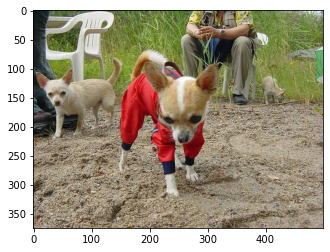

In [12]:
show_image(image_path=data_example_path)

Display the first batch of images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


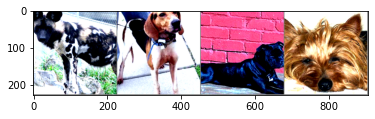

Image 1 label: African_hunting_dog
Image 2 label: Walker_hound
Image 3 label: Staffordshire_bullterrier
Image 4 label: Australian_terrier


In [13]:
# Get some random training images
dataiter = iter(dataloaders["val"])
images, labels = dataiter.next()

# Show images
show_batch_of_images(torchvision.utils.make_grid(images))

# Print labels
for i in range(len(images)):
    print(f"Image {i+1} label: {class_names[labels[i]].split('-')[1]}")

Calculate the mean and std of training images. This will be needed for the normalization transform of the train, val and test dataloaders.

In [14]:
# Create dataloder for unnormalized training data
unnormalized_dataloader, _, _ = load_unnormalized_train_data(data_src_dir)

# Use the dataloader to calculate mean and std of the unnormalized images
# Note: the images have been rescaled to (0, 1) by transforms.ToTensor()
train_data_mean, train_data_std = get_mean_std(unnormalized_dataloader)

print(f"Mean of training data: {train_data_mean}")
print(f"Std of training data: {train_data_std}")

Calculating mean...
Calculating std...
Mean of training data: tensor([0.4777, 0.4451, 0.3876])
Std of training data: tensor([0.2597, 0.2527, 0.2549])


Mean and std of the training images have been inserted into the dataloaders of the load_data utily function located in `<PROJECT_ROOT>/src/utils/data_utils.py`.

### Create and Register AML Dataset

Register the data as a file dataset in the AML workspace for easy accessibility throughout the ML lifecycle.

In [15]:
# Create a dataset object from the datastore location
dataset = Dataset.File.from_files(path=(datastore, datastore_target_path))

In [16]:
# Register the dataset
dataset = dataset.register(workspace=ws,
                           name=dataset_name,
                           tags=dataset_tags,
                           description=dataset_description,
                           create_new_version=True)